In [1]:
# Lesson from Intro to Cultural Analytics - https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/08-Topic-Modeling-Text-Files.html

In [22]:
path_to_mallet = "/Users/jeriwieringa/mallet-2.0.8/bin/mallet"

In [23]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

In [24]:
directory = "../data/Example_texts/history/NYT-Obituaries/"

In [25]:
files = glob.glob(f"{directory}/*.txt")

In [26]:
files

['../data/Example_texts/history/NYT-Obituaries/1945-Adolf-Hitler.txt',
 '../data/Example_texts/history/NYT-Obituaries/1915-F-W-Taylor.txt',
 '../data/Example_texts/history/NYT-Obituaries/1975-Chiang-Kai-shek.txt',
 '../data/Example_texts/history/NYT-Obituaries/1984-Ethel-Merman.txt',
 '../data/Example_texts/history/NYT-Obituaries/1953-Jim-Thorpe.txt',
 '../data/Example_texts/history/NYT-Obituaries/1964-Nella-Larsen.txt',
 '../data/Example_texts/history/NYT-Obituaries/1955-Margaret-Abbott.txt',
 '../data/Example_texts/history/NYT-Obituaries/1984-Lillian-Hellman.txt',
 '../data/Example_texts/history/NYT-Obituaries/1959-Cecil-De-Mille.txt',
 '../data/Example_texts/history/NYT-Obituaries/1928-Mabel-Craty.txt',
 '../data/Example_texts/history/NYT-Obituaries/1973-Eddie-Rickenbacker.txt',
 '../data/Example_texts/history/NYT-Obituaries/1989-Ferdinand-Marcos.txt',
 '../data/Example_texts/history/NYT-Obituaries/1991-Martha-Graham.txt',
 '../data/Example_texts/history/NYT-Obituaries/1997-Deng-Xia

In [27]:
help(little_mallet_wrapper)

Help on package little_mallet_wrapper:

NAME
    little_mallet_wrapper

PACKAGE CONTENTS
    little_mallet_wrapper

FILE
    /Users/jeriwieringa/opt/anaconda3/envs/REL560/lib/python3.8/site-packages/little_mallet_wrapper/__init__.py




In [28]:
help(glob)

Help on module glob:

NAME
    glob - Filename globbing utility.

MODULE REFERENCE
    https://docs.python.org/3.8/library/glob
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

FUNCTIONS
    escape(pathname)
        Escape all special characters.
    
    glob(pathname, *, recursive=False)
        Return a list of paths matching a pathname pattern.
        
        The pattern may contain simple shell-style wildcards a la
        fnmatch. However, unlike fnmatch, filenames starting with a
        dot are special cases that are not matched by '*' and '?'
        patterns.
        
        If recursive is true, the pattern '**' will match any files and
        zero or more directories and subdirectories.
    
    ig

Documentation for Little Mallet Wrapper - https://github.com/maria-antoniak/little-mallet-wrapper

In [29]:
training_data = []

for file in files:
    with open(file, encoding="utf-8") as f:
        text = f.read()
    processed_text = little_mallet_wrapper.process_string(text, numbers="remove")
    training_data.append(processed_text)

In [30]:
original_texts = []

for file in files:
    with open(file, encoding="utf-8") as f:
        text = f.read()
    original_texts.append(text)

In [31]:
obit_titles = [Path(file).stem for file in files]

In [32]:
obit_titles

['1945-Adolf-Hitler',
 '1915-F-W-Taylor',
 '1975-Chiang-Kai-shek',
 '1984-Ethel-Merman',
 '1953-Jim-Thorpe',
 '1964-Nella-Larsen',
 '1955-Margaret-Abbott',
 '1984-Lillian-Hellman',
 '1959-Cecil-De-Mille',
 '1928-Mabel-Craty',
 '1973-Eddie-Rickenbacker',
 '1989-Ferdinand-Marcos',
 '1991-Martha-Graham',
 '1997-Deng-Xiaoping',
 '1938-George-E-Hale',
 '1885-Ulysses-Grant',
 '1909-Sarah-Orne-Jewett',
 '1957-Christian-Dior',
 '1987-Clare-Boothe-Luce',
 '1976-Jacques-Monod',
 '1954-Getulio-Vargas',
 '1979-Stan-Kenton',
 '1990-Leonard-Bernstein',
 '1972-Jackie-Robinson',
 '1998-Fred-W-Friendly',
 '1991-Leo-Durocher',
 '1915-B-T-Washington',
 '1997-James-Stewart',
 '1981-Joe-Louis',
 '1983-Muddy-Waters',
 '1942-George-M-Cohan',
 '1989-Samuel-Beckett',
 '1962-Marilyn-Monroe',
 '2000-Charles-M-Schulz',
 '1967-Gregory-Pincus',
 '1894-R-L-Stevenson',
 '1978-Bruce-Catton',
 '1982-Arthur-Rubinstein',
 '1875-Andrew-Johnson',
 '1974-Charles-Lindbergh',
 '1964-Rachel-Carson',
 '1953-Marjorie-Rawlings',


# Create the Model of Topics

In [33]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 379
Mean Number of Words per Document: 1314.6
Vocabulary Size: 35983


In [34]:
num_topics = 15
training_data = training_data

In [35]:
output_directory_path = '../data/outputs/topic-model-output/NYT-Obit'

In [36]:
# First create the output directory if it does not already exist

Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

# Then create paths for all of the files Mallet will output

path_to_training_data = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [37]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet, 
                                             output_directory_path,
                                             num_topics,
                                             training_data)

Importing data...
Complete
Training topic model...


Mallet LDA: 15 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 19800
total tokens: 498252
<10> LL/token: -10.14049
<20> LL/token: -9.79811
<30> LL/token: -9.67741
<40> LL/token: -9.61144

0	0.33333	years national world year later league two mayor baseball chicago won control game home member became major cleveland votes team 
1	0.33333	years war french france british king china political first time chinese year queen britain later chiang prince england paris one 
2	0.33333	said first mao won television played never school man called also people another good even got series wrote three back 
3	0.33333	soviet united first states louis nations smith back went american communist moscow party three would time late june said took 
4	0.33333	general army military grant gen war government peace israel said union forces march men people days may upon troops family 
5	0.33333	new one york years world times first great made came white upon men black life two work american news edit

[beta: 0.02534] 
<210> LL/token: -9.28494
[beta: 0.03067] 
<220> LL/token: -9.34362
[beta: 0.03292] 
<230> LL/token: -9.35898
[beta: 0.03402] 
<240> LL/token: -9.35981

0	0.13628	baseball game louis ruth year team won world league years tennis babe rickey football one golf club record champion black 
1	0.14933	king mao china years chinese british deng minister french chiang queen france prince government war churchill lord year prime people 
2	0.63733	said also first years one wrote later won often called man two people school three got children became another family 
3	0.26263	soviet united party communist states foreign nations war world union truman political stalin moscow policy military khrushchev leader economic communists 
4	0.2572	general gen grant army war said israel president gandhi government men military upon command forces macarthur troops pershing peace israeli 
5	0.69785	new york times years time death first year came one two men upon almost united world news city later

[beta: 0.0386] 
<410> LL/token: -9.22856
[beta: 0.03886] 
<420> LL/token: -9.22415
[beta: 0.0389] 
<430> LL/token: -9.22192
[beta: 0.03901] 
<440> LL/token: -9.21944

0	0.09558	baseball louis game ruth team won league tennis abbott golf babe rickey champion club football world games dempsey times season 
1	0.08106	israel king war british minister gandhi queen india prime prince peace government arab israeli said mrs churchill lord egypt sadat 
2	0.74226	said years white first people one wrote also children called school black women mrs million kennedy often recalled later even 
3	0.16668	soviet party united mao communist china union military war political nations states foreign chinese stalin policy deng moscow truman leader 
4	0.12256	general gen grant army war president military macarthur command men pershing union said troops upon forces service april march admiral 
5	0.25595	times new york paper news newspaper ochs pulitzer world business editor murrow smith war barnum chattanooga 

[beta: 0.04055] 
<610> LL/token: -9.17983
[beta: 0.0408] 
<620> LL/token: -9.17498
[beta: 0.0408] 
<630> LL/token: -9.17458
[beta: 0.04099] 
<640> LL/token: -9.1767

0	0.0897	baseball game louis ruth team won tennis league abbott babe rickey football golf champion manager player dempsey club record games 
1	0.08297	israel king minister british war gandhi government prime queen india peace prince arab israeli churchill britain egypt mrs lord sadat 
2	0.46939	said black white kennedy mrs people king women children wrote also often negro president around called million rights johnson recalled 
3	0.15558	soviet party united mao communist china military political union states stalin chinese nations deng moscow foreign chiang khrushchev war policy 
4	0.12768	general gen grant army war military command president pershing macarthur men union troops forces upon march received sent colonel corps 
5	0.11721	times new paper news ochs york newspaper pulitzer luce editor world murrow barnum journali

[beta: 0.04152] 
<810> LL/token: -9.16383
[beta: 0.04163] 
<820> LL/token: -9.16431
[beta: 0.04182] 
<830> LL/token: -9.16701
[beta: 0.04192] 
<840> LL/token: -9.16016

0	0.10407	baseball louis game ruth team tennis won league babe rickey golf football abbott games champion dempsey manager season sports player 
1	0.09783	israel king british minister gandhi war peace government queen prime prince india arab israeli churchill egypt england lord sadat victoria 
2	0.27415	said black white kennedy king negro johnson civil rights president people washington nation space flight blacks mrs union leader farm 
3	0.16868	soviet party united mao china communist war military political states chinese stalin moscow deng union foreign chiang power khrushchev economic 
4	0.14468	general gen grant army war military president upon men pershing command macarthur march sent states troops april forces union received 
5	0.12261	times paper new news ochs newspaper york pulitzer luce editor murrow barnum world

Complete


([['baseball',
   'game',
   'louis',
   'ruth',
   'team',
   'tennis',
   'won',
   'league',
   'babe',
   'rickey',
   'golf',
   'abbott',
   'football',
   'champion',
   'manager',
   'record',
   'season',
   'dempsey',
   'club',
   'games'],
  ['israel',
   'king',
   'british',
   'minister',
   'war',
   'gandhi',
   'prime',
   'queen',
   'peace',
   'prince',
   'government',
   'india',
   'arab',
   'israeli',
   'lord',
   'churchill',
   'egypt',
   'england',
   'sadat',
   'britain'],
  ['black',
   'kennedy',
   'said',
   'white',
   'king',
   'negro',
   'rights',
   'johnson',
   'people',
   'nation',
   'civil',
   'space',
   'blacks',
   'union',
   'negroes',
   'racial',
   'randolph',
   'president',
   'atlanta',
   'flight'],
  ['soviet',
   'party',
   'united',
   'mao',
   'communist',
   'war',
   'china',
   'states',
   'military',
   'political',
   'foreign',
   'union',
   'chinese',
   'nations',
   'stalin',
   'deng',
   'moscow',
   'econ

# View Results

In [38]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

In [39]:
for topic_number, topic in enumerate(topics):
    print(f"🌟 Topic {topic_number} 🌟\n\n{topic}\n")

🌟 Topic 0 🌟

['baseball', 'game', 'louis', 'ruth', 'team', 'tennis', 'won', 'league', 'babe', 'rickey', 'golf', 'abbott', 'football', 'champion', 'manager', 'record', 'season', 'dempsey', 'club', 'games']

🌟 Topic 1 🌟

['israel', 'king', 'british', 'minister', 'war', 'gandhi', 'prime', 'queen', 'peace', 'prince', 'government', 'india', 'arab', 'israeli', 'lord', 'churchill', 'egypt', 'england', 'sadat', 'britain']

🌟 Topic 2 🌟

['black', 'kennedy', 'said', 'white', 'king', 'negro', 'rights', 'johnson', 'people', 'nation', 'civil', 'space', 'blacks', 'union', 'negroes', 'racial', 'randolph', 'president', 'atlanta', 'flight']

🌟 Topic 3 🌟

['soviet', 'party', 'united', 'mao', 'communist', 'war', 'china', 'states', 'military', 'political', 'foreign', 'union', 'chinese', 'nations', 'stalin', 'deng', 'moscow', 'economic', 'chiang', 'leader']

🌟 Topic 4 🌟

['general', 'gen', 'grant', 'army', 'war', 'military', 'president', 'macarthur', 'upon', 'command', 'pershing', 'troops', 'union', 'men',

In [40]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [41]:
topic_distributions[32]

[0.04818636859150551,
 0.00012425762065530367,
 0.0002515510842012991,
 0.008002549795489785,
 0.004879545145816751,
 0.0017293640068895197,
 0.3297149516448954,
 0.00021789509555681708,
 0.28444202013265224,
 0.014326473674358674,
 0.2730627456395768,
 0.00013619326884606095,
 0.00018689009421186958,
 0.00032014238338590477,
 0.03441905182195804]

In [42]:
obituary_to_check = "1962-Marilyn-Monroe"

obit_number = obit_titles.index(obituary_to_check)

In [43]:
print(f"Topic Distributions for {obit_titles[obit_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[obit_number])):
    print(f"🌟Topic {topic_number} {topic[:6]} 🌟\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for 1962-Marilyn-Monroe

🌟Topic 0 ['baseball', 'game', 'louis', 'ruth', 'team', 'tennis'] 🌟
Probability: 0.048

🌟Topic 1 ['israel', 'king', 'british', 'minister', 'war', 'gandhi'] 🌟
Probability: 0.0

🌟Topic 2 ['black', 'kennedy', 'said', 'white', 'king', 'negro'] 🌟
Probability: 0.0

🌟Topic 3 ['soviet', 'party', 'united', 'mao', 'communist', 'war'] 🌟
Probability: 0.008

🌟Topic 4 ['general', 'gen', 'grant', 'army', 'war', 'military'] 🌟
Probability: 0.005

🌟Topic 5 ['times', 'new', 'news', 'paper', 'ochs', 'york'] 🌟
Probability: 0.002

🌟Topic 6 ['years', 'new', 'first', 'one', 'world', 'later'] 🌟
Probability: 0.33

🌟Topic 7 ['university', 'professor', 'moses', 'science', 'research', 'work'] 🌟
Probability: 0.0

🌟Topic 8 ['one', 'would', 'time', 'said', 'could', 'made'] 🌟
Probability: 0.284

🌟Topic 9 ['president', 'roosevelt', 'state', 'court', 'house', 'states'] 🌟
Probability: 0.014

🌟Topic 10 ['miss', 'film', 'theater', 'movie', 'broadway', 'films'] 🌟
Probability: 0.27

# Visualize Result

In [45]:
import random
target_labels = random.sample(obit_titles, 10)

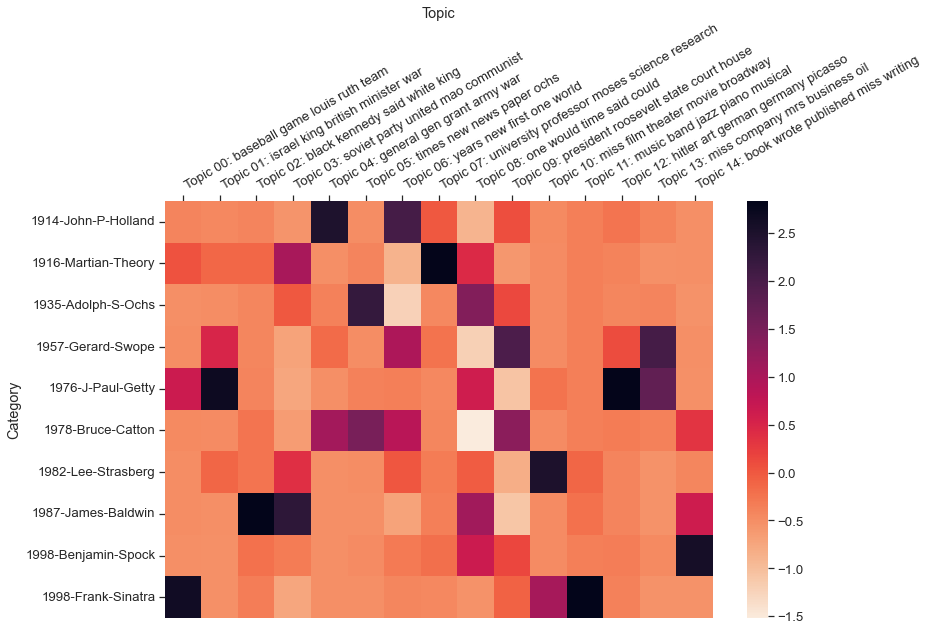

In [46]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(obit_titles,
                                                       topic_distributions,
                                                       topics,
                                                       output_directory_path + '/categories_by_topics.pdf',
                                                       target_labels=target_labels,
                                                       dim= (13,9)
                                                       )

# Display top titles per topic

In [47]:
training_data_obit_titles = dict(zip(training_data, obit_titles))
training_data_original_text = dict(zip(training_data, original_texts))

In [48]:
def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    print(f"🌟Topic {topic_number}🌟\n\n{topics[topic_number]}\n")
    
    for probability,document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_obit_titles[document] + "\n")
    return

In [50]:
display_top_titles_per_topic(topic_number=0, number_of_documents=5)

🌟Topic 0🌟

['baseball', 'game', 'louis', 'ruth', 'team', 'tennis', 'won', 'league', 'babe', 'rickey', 'golf', 'abbott', 'football', 'champion', 'manager', 'record', 'season', 'dempsey', 'club', 'games']

0.659 1941-Lou-Gehrig

0.5671 1985-Roger-Maris

0.5519 1955-Cy-Young

0.5251 1991-Leo-Durocher

0.4673 1953-Jim-Thorpe



What would you label this topic?

# Display Topic Words in Context

In [57]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topics=topics, topic_number=3, number_of_documents=3, custom_words=None):
    
    print(f"🌟Topic {topic_number}🌟\n\n{topics[topic_number]}\n")
    
    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
            
        probability = f"🌟🌟🌟\n\n**{probability}**"
        obit_title = f"**{training_data_obit_titles[document]}**"
        original_text = training_data_original_text[document]
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words
        
        for word in topic_words:
            if word in original_text:
                original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)
        
        display(Markdown(probability)), display(Markdown(obit_title)), display(Markdown(original_text))
    return

In [58]:
display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3)

🌟**Topic 3**🌟

['soviet', 'party', 'united', 'mao', 'communist', 'war', 'china', 'states', 'military', 'political', 'foreign', 'union', 'chinese', 'nations', 'stalin', 'deng', 'moscow', 'economic', 'chiang', 'leader']



🌟🌟🌟

**0.541905172390257**

**1982-Leonid-Brezhnev**

November 11, 1982

 OBITUARY

 Brezhnev Attempted to Advance Soviet Goals Through Detente; Soviet Leader Used Consensus in Politburo on Domestic Issues

 By THE NEW YORK TIMES

 As the **leader** of the Soviet Union, Leonid Ilyich Brezhnev was a canny and careful Communist Party functionary who sought to make his country the **military** equal of the United States and promote its **political** influence around the world through the policy of detente.

 In domestic affairs, as General Secretary of the Communist Party, Mr. Brezhnev (pronounced BRYEHZH-nyev) ruled as first among his equals on the Politburo, not as an autocrat, and professed to want **economic** development of his country of 265 million people spread over a sixth of the globe's land area.

 Both his policy and his health faltered in these tasks in the last years of his life. Detente, which had seemed a necessity to many Western leaders after Soviet tanks moved into Czechoslovakia in 1968 to crush the liberalization of the ''Prague Spring,'' lost much of its appeal in the United States after the Soviet invasion of Afghanistan in 1979, and President Carter imposed an embargo on grain sales and other trade curbs.

 After the Polish **military** authorities ceded to pressure from Moscow and declared martial law in December 1981, President Reagan imposed further **economic** and **political** sanctions on the Soviet Union, though not an embargo on grain sales. The Western European allies remained more reluctant to cut back their important industrial trade with the Russians, and insisted on going ahead with the deal, creating a **political** rift within the NATO alliance that Mr. Brezhnev obviously sought to exploit.

 But domestic **economic** stagnation had become an acute domestic problem by the end of the Brezhnev years. In this area, despite their recognition of the crisis, the aging Soviet leaders made no effective attempt to reform the rigidities of centralized **economic** planning. And as the standard of living declined, **political** repression increased. Dissidents, who had emerged openly in the mid-1970's to criticize violations of human rights, were later harassed until most had either left the country or were in prison camps by the early 1980's. Soviet Jews, who had been permitted to emigrate by the thousands a month in 1977 and 1978, found that by 1982 permission to emigrate was virtually impossible to get.

 In his last years, Mr. Brezhnev's speech became labored and his features pale and bloated, apparently as a result of medical treatments for a disability that was never publicly revealed. At the height of his powers in the early 1970's, in contacts with Presidents Nixon, Ford and Carter and Secretary of State Henry A. Kissinger, he was a burly, gray-haired, black-browed figure of 5 feet 10 inches, gregarious and talkative, but powerful and very much aware of his power over associates and adversaries alike.

 Then he had a reputation as a lover of good food and drink, fast cars - which he collected - and hunting. Mr. Brezhnev talked extensively about his weight, which he sought vainly to keep under control, and often joked about his excessive cigarette smoking, which was thought to have aggravated his health problems.

 His smoking (Philip Morris Multifilters) was such a vexation that he used a box with a time lock to slow his pace. But he conceded to one visitor, ''I keep a reserve pack in the other pocket.''

 Ultimately he had to give up smoking altogether.

 Long Part of Coalition

 Mr. Brezhnev was long part of a coalition in the ruling Politburo of his **party**'s Central Committee. Two other members of the coalition who for years were most visible to the West were Prime Minister Aleksei N. Kosygin, who died in December 1980, and President Nikolai V. Podgorny, who was ousted from the leadership group in 1977.

 In the early years, after this coalition had ousted Nikita S. Khrushchev in a bloodless coup in 1964, it operated as a troika, with none of its members seemingly more authoritative than the others.

 Prominent, first in support of Mr. Khrushchev and then as a member of the coalition that ousted him, was Mikhail A. Suslov, the **party**'s ideologist. As Mr. Brezhnev encountered growing problems with his health, Mr. Suslov's authority, already enormous, seemed to grow to the point where many considered him the second-ranking figure in the hierarchy. But death removed the ascetic ideologist from the leadership on Jan. 25, 1982, at the age of 79.

 In the fall of 1970 Mr. Brezhnev emerged from his post as the **party** chief to become the personal ambassador for detente. This occurred in his first meeting with Chancellor Willy Brandt of West Germany and in a subsequent conference with President Charles de Gaulle of France.

 In these and in other meetings in 1971, the Soviet **leader** appeared stiff and uncomfortable, but he loosened up remarkably as his selfconfidence grew.

 On June 11, 1979, Mr. Brezhnev and President Carter, meeting in the ornate Hofburg Palace in Vienna, signed an arms control treaty that for the first time limited both sides to the same maximum number of long-range bombers and missiles.

 For millions of television viewers around the globe, Soviet-Western rapprochement was symbolized when the two leaders embraced just after the signing and, to a crescendo of applause from onlookers, Mr. Brezhnev gave Mr. Carter hearty kisses, Russian-style, on both cheeks.

 Despite the optimism expressed by the two men at the signing ceremony, the treaty came under criticism from a number of United States senators who believed it conferred a unilateral advantage on the Soviet Union in heavy land-based missiles. Mr. Carter withdrew the treaty from Senate consideration after the invasion of Afghanistan, and it was never approved by the Senate.

 Detente Policy Set Back

 Mr. Brezhnev's detente policy was further set back by the establishment of martial law in Poland in December 1981. With the intervention in Afghanistan began a hardening of attitudes in the West, including an American boycott of the Moscow Olympics in 1980 and the imposition of trade restrictions by the United States and other Western countries; Mr. Brezhnev criticized these steps as a return to the cold **war**, but never acknowledged the Soviet Union's responsibility for provoking them.

 Instead, in his statements and speeches, Mr. Brezhnev sought to portray his country as still open to arms reductions talks and detente, not only with the West but also, with increasing emphasis as relations with the West deteriorated, with China.

 In February 1982, the Soviet **leader** proposed a two-thirds cut by 1990 in both sides' medium-range nuclear arsenals in Europe. He said the Soviet Union was ready to reach agreement not only on the complete termination of all tests of nuclear weapons but also on ending their further production and on the reduction and subsequent elimination of their stockpiles.

 Early in March he announced that Moscow was suspending its deployment of new medium-range missiles in the European part of the Soviet Union. He said this was intended to set ''a good example.''

 But United States officials saw his moves as attempts ''to convey the impression of restraint while diverting attention from the enormous growth of Soviet capability.''

 In a public appearance in Tashkent on March 24, Brezhnev issued a new appeal to Peking to revive the search for ways to end the Chinese-Soviet feud. ''We remember well the time when the Soviet

 Union and People's China were **united** by bonds of friendship and comradely cooperation,'' he said. Negotiations with the Chinese did resume in the fall of 1982, and Mr. Brezhnev, in a speech to an audience of Soviet generals shortly afterward, said that while the prospects of a real improvement in relations were slim, the Soviet Union had an interest in pressing for them.

 Regarding detente with the West, the still unratified arms control treaty with the United States entailed some Soviet concessions, but on several other issues, Mr. Brezhnev's approach to the policy - called ''peaceful coexistence'' under Mr. Khrushchev - accomplished much for the Soviet Union.

 These accomplishments included strategic nuclear parity with the United States; an increase in conventional **military** strength on land and at sea; acknowledgment by West Germany and the rest of Western Europe of the division of Germany and of Europe; recognition of East Germany and its admission to the United Nations; increasing imports of Western technology to modernize the Soviet economy, and a growing role in the Middle East and Africa.

 Concession on Emigration

 These were attained with few concessions to the West. A major concession -or certainly the most publicized - was the Soviet willingness to permit some emigration, mostly for Jews, starting in the late 1960's.

 The policy of allowing emigration for Soviet citizens was, however, a controversial one within the leadership, and there were periodic indications, especially from the police apparatus, of disquiet with this relaxation of traditional curbs. The most recent tightening came in 1981 in response to stiffening Western positions over the intervention in Afghanistan.

 In addition, there was some evidence that Mr. Brezhnev's critics in Moscow felt that he had not gained sufficient trade and credit advantages in bargaining with the United States.

 Efforts in Washington to make improved commercial ties dependent on further relaxation of emigration restrictions illustrated one of the practical problems of detente. Mr. Brezhnev could not explicitly lift emigration barriers because this might be construed as bowing to external pressures, and the United States could not do less than insist, owing to its domestic pressures.

 Although Mr. Brezhnev and American Presidents were in accord on avoiding situations that might lead to armed conflict, there were world areas where the interests of the two superpowers clashed. In the Middle East, the Soviet Union supported Arab nationalism with arms and technical experts and carried on a campaign to discredit Israel. Syria and Iraq were among the main beneficiaries of Soviet backing.

 When strikes and rioting in Iran in late 1978 began to build up into a revolution, Mr. Brezhnev issued a warning against ''outside interference, especially **military** interference'' by the United States. At about the same time, he cemented Moscow's ties with the new pro-Soviet regime in Afghanistan by signing a 20-year treaty of friendship and cooperation, binding the two countries to close **economic** and **military** links.

 In the Horn of Africa, the power balance was reversed as Ethiopia, once a client of the United States, shifted to the Soviet camp, while Somalia, once close to Moscow, effected a rapprochement with Washington.

 Invasion of Czechoslovakia

 There was also an adversary conflict over India. In Southeast Asia, Soviet **military** aid helped North Vietnam to victory over Americansupported South Vietnam. In Central America, the Reagan Administration charged that the Soviet Union, through its Cuban allies, was trying to expand Communist influence in Nicaragua under the Sandinist regime that came to power in 1979, and by supporting the leftist guerrilla movement in El Salvador.

 In Europe, on the other hand, the superpowers were less at daggersdrawn. One evidence of this was the change in Western attitudes toward Czechoslovakia after 1968. In that year, Soviet-led forces went into Czechoslovakia to depose Alexander Dubcek, the Communist **leader** who had become an apostate from Kremlin orthodoxy. Mr. Brezhnev, defending the incursion, found his name associated with ''the

 Brezhnev Doctrine'' - that the Soviet Union had a right to enforce by arms its control in Eastern Europe.

 The bluntness of Mr. Brezhnev's interventions in Czechoslovak internal affairs was as much condemned then as the baldness of his doctrine. Ranged against him were not only a large segment of public opinion in the West, but also dissenters within two major Communist parties in Western Europe.

 Both the French and the Italian parties rebuked Mr. Brezhnev, and their assertion of independence from Moscow developed into the separate line of Communist development known as Eurocommunism, though it also faded towards the end of his rule.

 Despite the Czechoslovak episode, Mr. Brezhnev managed to maintain the cohesiveness of Eastern Europe, and only independent-minded Rumania was the odd man out in retaining cordial relations with China.

 But the cohesion among Moscow's allies in Eastern Europe came under strain - more even perhaps than occurred over Hungary in 1956 and Czechoslovakia in 1968 - as the rise of the Solidarity trade **union** movement in Poland in 1980 fostered a wide-ranging liberalization of Polish life that ended in December 1981 with the imposition of martial law.

 Chinese-Soviet Dispute

 With China, Mr. Brezhnev maintained strictly correct relations at the governmental level while hurling anathemas against the Peking leadership, both in the last decade of Mao Zedong's life and under Mao's successors. For a long time, the Chinese-Soviet dispute was both doctrinal and territorial, and it involved a struggle for hegemony over nationalist and revolutionary forces in the third world. Soviet policy toward the Chinese fluctuated in response to changes in the situation.

 At first, Mr. Brezhnev made a number of efforts to convoke a congress of adherents to Moscow's version of Communism that would read China out of the world Communist movement, but he was unable to gather a sufficiently impressive alignment.

 This failure was ascribed partly to an underlying distaste among Communists, even in the Soviet Union, to a formal splitting of the Communist movement; partly to Peking's stature in strategic areas of the third world, and partly to hope among substantial segments of pro-Moscow Communists that the Soviet Union and China could ultimately be reconciled.

 The confrontation never escalated to the point of **war**. When China invaded Vietnam early in 1979, Mr. Brezhnev duly warned Peking to halt its ''brazen bandit attack,'' but the statement was relatively subdued in tone. Tentative moves to improve relations betweeen the two countries followed; at the same time, Vietnam fell clearly into the Soviet sphere of influence.

 Mr. Brezhnev's power within the Soviet Union derived from his position as the head of the ruling **party** rather than from his assumption of the nation's presidency - for the second time - in 1977. In the gradual loosening of the Soviet system of one-man rule, Mr. Brezhnev was not, however, the single dominant **leader**, as Lenin, Stalin and Khrushchev had been, and he sought, not always successfully, to reduce many of the trappings of ''the cult of personality'' that Stalin and then Khrushchev had nurtured.

 Because Mr. Brezhnev's power was more circumscribed than that of his predecessors, he was obliged to come to terms with often competing interests.

 Careful Arms Negotiator

 One of the groups that Mr. Brezhnev had to take into account was the **military** establishment. Like their counterparts in Western countries, Soviet **military** leaders tended to favor large budgets, impressive displays of weaponry and conservative mentalities.

 But the Soviet **leader** was never so much at odds with his ''militaryindustrial complex'' as some Western politicians and analysts thought and hoped.

 In the slow-moving negotiations on the limitation of strategic arms, Mr. Brezhnev bargained carefully with American Presidents, constantly checking during the negotiations with other Politburo members, including the representatives of the **military**. He always seemed careful to move in tandem with the **military** on all significant policy issues.

 On the other hand, Mr. Brezhnev, by wheeling and dealing (how was never made public), altered the complexion of the Politburo over the years so that he was able to accumulate a large measure of personal power without arousing his colleagues' fears of a return to one-man rule. Shortly after the collective leadership was installed in 1964, he neutralized Aleksandr N. Shelepin, an ambitious Politburo member, by shifting him from control of the security police to the trade **union** leadership.

 And in December 1965, he persuaded Mr. Podgorny to yield a key **party** secretary's post to become chairman of the Presidium of the Supreme Soviet, a ceremonial post equivalent to that of President of the Union of Soviet Socialist Republics. Mr. Podgorny was to hold the presidency for 12 years until Mr. Brezhnev himself assumed that post in addition to the **party** leadership.

 In 1971 four new men, all Brezhnev supporters, were elected to the Politburo. And two years later he eased out Pyotr Y. Shelest and Gennadi I. Voronov, both considered opponents of detente. Despite this seeming majority in the Politburo, which was further consolidated in subsequent years, Mr. Brezhnev was subject to scrutiny on such matters as the performance of the economy, the size of the grain harvest, corruption in the **party** machinery and the development of Siberia. In addition, of course, the detente policy was examined from time to time in terms of specific Soviet advantages, **political** and commercial.

 One of Mr. Brezhnev's dreams was to oversee the rapid development of Siberia with the aid of outside credits and technology. Blocked by United States reluctance to commit substantial capital to the venture, he turned increasingly to Western Europe and Japan for partners in Siberian development projects.

 Projected Air of Realism

 The ebullience Mr. Brezhnev displayed abroad or to **foreign** visitors was in contrast to his staid and conservative deportment in Soviet public life. There he was very much the Communist in the gray flannel suit, proper and formal and serious. The air he projected was one of realism, calmness and stability.

 He was not much in the public view, except on ceremonial occasions. Nonetheless, there seemed to be a conscious effort to humanize him in official photographs that showed him, for example, in shirtsleeve talks with Chancellor Brandt of West Germany, greeting women factory workers in Yugoslavia with a kiss on the lips, hoisting up young children in Poland, or wearing dark glasses and an opennecked windbreaker and leaning against the gunwales of a yacht.

 Although Mr. Brezhnev appeared to enjoy the limelight, he was careful to let a share fall on his principal colleagues. Both Mr. Kosygin and - while he was President - Mr. Podgorny journeyed abroad from time to time, and Foreign Minister Andrei A. Gromyko, who was elevated to Politburo membership under Mr. Brezhnev, remained the principal Soviet spokesman abroad.

 Mr. Brezhnev's attitude toward expressions of dissent in the Soviet Union was firm. A number of intellectuals, artists and scientists opposed the Kremlin's ideological policies in whole or in part, and there was restiveness among Soviet youth.

 Outspoken dissidents in the Brezhnev years often found themselves committed to prison, mental institutions or deprived of their jobs. Some were deported to the West, notably Aleksandr I. Solzhenitsyn, the novelist. Those who remained, including Andrei

 D. Sakharov, were denounced as lacking in socialist consciousness, which meant a refusal to place their talents at the disposal of the ruling ideology.

 Describes His

 Ideology

 As Mr. Brezhnev described his views a couple of years ago: ''People who fall for self-publicity, ready to make a name for themselves not through work for the homeland but by any politically dubious means - and not disdaining to praise our ideological opponents - sometimes fall into their net. The Soviet public harshly denounces the abominable deeds of these double-dealers. ''Renegades should not expect to get away unpunished. The country's enemies clutch with great tenacity at any manifestations of ieological immaturity or hesitation among the intellectuals.''

 Mr. Brezhnev left the formulation of ideology to others, chiefly Mr. Suslov, the **party** ideologist and Politburo member whose close association with the **party** **leader** grew in the years after the ouster of Mr. Khrushchev in 1964. Mr. Brezhnev's speeches were often more pragmatic than ideological, although earlier he had studded his remarks with Marxist references to the decline and corruption of capitalism. But he avoided the flourishes that were associated with Mr. Khrushchev, who once promised ''to bury capitalism.'' Nor did Mr. Brezhnev contend, as his predecessor did, that the Soviet Union would become a wonderland of material satisfactions while the United States and other capitalist societies were developing into wastelands for their citizens.

 Mr. Brezhnev and his colleagues displayed some uncertainties in handling Soviet public opinion, especially regarding Stalinism. Whereas Mr. Khrushchev had pursued a clear-cut policy of de-Stalinization after denouncing Stalin's excesses in l956, the Brezhnev group tempered the policy on the ground that it was undermining the authority and unity of the Communist system.

 The Stalin issue, with which the Soviet Union has not come fully to terms, was hushed up, but a nostalgia for some aspects of Stalin's rule was permitted to revive. His leadership in World War II was occasionally mentioned; his face reappeared on movie screens; and his bust was mounted on his grave behind the Lenin Mausoleum in Red Square.

 The memory of Mr. Khrushchev was, on the contrary, long drowned in official silence. The anniversaries of his death were not noted, nor was his regime recalled in panegyrics.

 But Mr. Brezhnev, in reminiscences published in November 1978 in the Soviet magazine Novy Mir, gave Mr. Khrushchev some credit as an administrator of agricultural policy - although he also described him as having been petulant, stubborn and apt to use strong language.

 When Mr. Brezhnev came to power after Mr. Khrushchev's ouster, his hold on the Communist **party** seemed a little uncertain at first. In recent years, however, he appeared to accept greater deference as due his position as both the nation's President and the **party**'s chief.

 For Red Square parades, for instance, he usually mounted to the reviewing stand on the top of the Lenin Mausoleum ahead of other members of the Politburo. When the crowd applauded, he sometimes doffed his hat, waved and smiled in response. Mr. Kosygin and others looked at the throng but refrained from responding to its acclaim.

 In contrast to the endless anecdotes illuminating Mr. Khrushchev's jaunty and unpredictable personality, little humor surrounded Mr. Brezhnev or his colleagues. But Soviet citizens quietly exchanged jokes about the Soviet **leader**, most of them unflattering.

 He rode around Moscow in a ZIL limousine, modeled after the 1965 Lincoln Continental, and he was often observed riding out of the Kremlin on a Sunday afternoon through crowds of visitors. He was in the front seat beside the driver with only one security guard in the back and no escort vehicles. The crowd looked at him blankly, and he looked back in the same fashion. Some Earthy Amusements

 Because of his position, he had a choice of good housing, but he continued to live in his old apartment on Kutuzov Prospekt. In moments away from his office in the Kremlin, he seemed to enjoy earthy amusements and glad-handing.

 Once at a circus performance, women performers in scanty costumes presented him with bouquets of flowers. He thanked the first few with kisses. Then a few more. And then he made certain that those at the rear were not omitted, for they, too, received hearty, full-faced busses. Finally, he donned his glasses and settled back to watch the performance, with the pleasure of one who finds a circus more entertaining than the ballet or an opera.

 Mr. Brezhnev's broad face with its dominating eyebrows often lost some of its impassivity at cocktail parties, once he could down an impressive number of cognacs or straight vodkas. In the last few years, though, he was under physicians' orders to cut down on drinking.

 Before he assumed the **party** leadership in 1964 and when he traveled abroad on good-will missions during a previous stint as President, he liked to unbend in toasts. On a visit to Iran in 1963, after toasting a seemingly endless list of worthy objectives, he lifted his vodka glass to exclaim: ''Down with protocol! Long live freedom!''

 In some private conversations he displayed a certain candor. In 1963, while talking with Glenn T. Seaborg, then chairman of the United States Atomic Energy Commission, he conceded that most Soviet buildings were hideous and suggested that the Soviet Union might profit by sending some of its young architects abroad to study.

 Although Mr. Brezhnev did not have much time for hobbies, he was known to enjoy hunting, swimming and watching soccer. He also collected antique watches and was an ardent ornithologist, reputed to have one of the finest collections of live birds in Moscow. He had an interest in agriculture and land reclamation.

 Born in the Ukraine

 Before his rise to eminence as Mr. Khrushchev's protege, Mr. Brezhnev was not conspicuous in Soviet life. Of Great Russian parentage, he was born Dec. 19, 1906, in Kamenskoye, now Dneprodzerzhinsk, in the Ukraine. His father was a steelworker.

 The boy began his working life at 15 in the local steel mill. Starting in 1923, he went to school nights and was graduated four years later from a land survey and reclamation school in Kursk.

 In this period he joined the Komsomol, the Young Communist League, and at the age of 25 he was accepted as a member of the Communist Party. At the same time he entered the steel engineering school in his hometown. He was graduated in 1935 and worked as an engineer for two years.

 In May 1937 he was elected deputy mayor of Dneprodzerzhinsk, his first post in government. Having impressed **party** leaders with his abilities, he was promoted the following year to a **party** secretaryship of Dnepropetrovsk Province at a time when Mr. Khrushchev headed the **party** in the Ukraine. Their friendship is believed to have begun at that time.

 In World War II Mr. Brezhnev served with the Red Army as a **political** commissar with the 18th Army in a beachhead on the Black Sea coast of the Caucasus, in the Crimea and in the Ukraine. On his 60th birthday Soviet authorities reviewed his **war** record and said: ''In the period of severe trials during the Great Patriotic War against Hitler's aggressors, while directing the army's **political** department and the southern and fourth Ukrainian front's **political** boards, you played a direct part in devising and conducting combat operations; you experienced such historic engagements as the battle of the Caucasus, and the liberation of

 Crimea and the Ukraine. The fighting men and commanders of the Soviet Army know you as an outstanding **political** worker and a man of great spirit and courage.''

 Mr. Brezhnev's wartime exploits were also romanticized and effusively praised in biographical articles that began appearing in the late 1970's. By then, he also carried to honorific title of

 Marshal of the Soviet Union.

 Mr. Brezhnev's **war** experience was the foundation for his many friendships among Soviet **military** men, who were one of the chief sources of his later influence in **party** and government affairs.

 Mr. Brezhnev, returning to civilian life in 1946, was named to a series of responsible **party** posts in the Ukraine, supervising postwar reconstruction, and was then brought to Moscow in 1950 for further seasoning in the Central Committee's secretariat.

 In the middle of 1950 he was sent to the Moldavian Republic as **party** **leader**, a post he held for two years. Simultaneously, he was elected a member of the national Central Committee and a candidate member of its Presidium, as the Politburo was then called. He was also named a national secretary, a position he occupied until the death of Stalin in 1953.

 When the **party** leadership was reorganized after the dictator's death, Mr. Brezhnev was dropped from the secretaryship and from the Presidium, apparently because he was not in the confidence of Vyacheslav

 M. Molotov, Georgi M. Malenkov and others who took over from Stalin.

 After a brief return to **political** work in the Ministry of Defense as the chief **political** commissar of the armed forces, Mr. Brezhnev resumed his rise in the **party** hierarchy in July 1957, when Mr. Khrushchev ousted some of his rivals from the leadership.

 Supervised Virgin Lands

 For his loyalty to Mr. Khrushchev, Mr. Brezhnev was rewarded with the leadership of the republic of Kazakhstan. His job was to supervise Mr. Khrushchev's virgin lands project, which brought vast acreage into productive use. In two years 87 million acres were placed under cultivation.

 Mr. Brezhnev had proved the program a success, confounding experts who had forecast its failure. The project later ran into difficulties, but not until Mr. Brezhnev had earned a splendid reputation as an administrator, a man who could accomplish the impossible.

 After being called back to Moscow, Mr. Brezhnev was made President of the Soviet Union in 1960, replacing Marshal Kliment Y. Voroshilov. As President, Mr. Brezhnev became a traveling saleman for the Soviet system, visiting Italy, North Korea, Finland,

 Morocco, Guinea, Ghana, Yugoslavia and Iran. His travels and his friendship with Mr. Khrushchev convinced many observers that he was being groomed as the **party** **leader**'s successor.

 That speculation increased in 1963, when Mr. Brezhnev combined his job as President with that of second national secretary of the **party**, in charge of personnel selection. Then, in the summer of 1964, he stepped down as President to devote full time to his **party** tasks.

 Suddenly that fall, criticism of Mr. Khrushchev within the **party** councils came to an abrupt climax, and he was obliged to retire, ostensibly because of his age (he was in his 70's) and his health.

 Although there was no official bill of particulars, it became known that he had been ousted on accusations of bungling the Cuban missile crisis with the United States in 1962, mishandling the Soviet rift with China, mismanaging the Soviet economy and supporting a cult of personality.

 Although he defended his policies, his removal from office by the Central Committee's Presidium was confirmed by the committee itself. In his stead the collective leadership of Mr. Brezhnev, Mr.

 Kosygin and Mr. Podgorny took over.

 Four days later Mr. Brezhnev and his associates appeared atop the Lenin Mausoleum at a celebration for three astronauts, the first to circle the earth in a multiseat spacecraft.

 Speaking in a deep baritone and reading his address through darkrimmed glasses, Mr. Brezhnev promised to spur the economy, lift living standards and insure social democracy. In **foreign** matters, he said, the Soviet Union would continue efforts toward peaceful coexistence with capitalist **states**.

 Seeking to assure the Soviet public, to which he was virtually unknown, he also promised that the **party**'s new leaders would ''constantly feel the pulse of the people's life.''

 Health Seemed to Decline

 Mr. Brezhnev subsequently became, of course, well known to the Soviet public, and in recent years the state of his health became a continual subject of speculation in the Soviet Union as elsewhere.

 A United States intelligence report, early in 1978, that he was suffering from gout, leukemia and emphysema was not officially confirmed, but by February 1979 it was evident that he was ailing.

 He seemed to lack stamina, to have become unable to put in the long work days that his position required, to be leaning more heavily than in the past on such aides as Konstantin U. Chernenko, who became a full member of the Politburo in November 1978.

 At the same time several other allies of Mr. Brezhnev were promoted to the inner circle of the Soviet leadership, but the shifts gave no hint of who his eventual successor might be.

 Mr. Brezhnev's apparent ill health was in evidence during his meeting with President Carter in June 1979, which was the first Soviet-American summit meeting since late 1974.

 While in Vienna, Mr. Brezhnev was seen to stumble on a couple of occasions, and he shut his eyes from apparent fatique while President Carter made a short public statement on the day the treaty was signed.

 And in his trip to East Berlin in October 1979, Mr. Brezhnev's condition seemed to have deteriorated even further as he frequently slurred his words during his 35-minute address to the East German Parliament.

 Mr. Brezhnev held a number of decorations. In 1961 he was made a Hero of Socialist Labor ''for outstanding services in the development of rocket technology and in guaranteeing the successful flight of man into outer space in the Sputnik spacecraft 'Vostok.' '' The citation did not elaborate on his contributions to that flight, nor did his official biography specify his role.

 He also held five Orders of Lenin and was twice given the title of Hero of the Soviet Union, on his 60th and 70th birthdays. In keeping with Soviet practice, little of Mr. Brezhnev's family life was in the public domain. It was known that he and his wife, Viktoriya, had three children; two sons, one of whom, Yuri, is a First Deputy Minister of Foreign Trade, the other a student at Moscow

 University; and a daughter, Galina, who works as a journalist at Novosti, the Soviet news feature agency.

 



🌟🌟🌟

**0.5255903506363874**

**1997-Deng-Xiaoping**

February 20, 1997

 OBITUARY

 Deng Xiaoping: A Political Wizard Who Put China on the Capitalist Road

 By PATRICK E. TYLER

 Like Mao Zedong and Zhou Enlai before him, Deng Xiaoping was among the small group of revolutionary elders who fought as guerrillas for the Communist cause and then dominated the leadership of the People's

 Republic they proclaimed on Oct. 1, 1949.

 Few if any figures in this century matched Mr. Deng for **political** longevity.

 Nearly half a century has passed since Mao first installed Mr. Deng in the upper-reaches of power in China, making him general secretary of the world's largest Communist Party in 1954.

 Twice he was to be dragged down from those heights -- purged as a ''capitalist roader'' in 1967 during the Cultural Revolution and again -- after a remarkable comeback -- following the death of Mao in 1976.

 Only with his second resurrection did Mr. Deng begin to consolidate his power, becoming China's paramount **leader** in 1978. He was then 74, seemingly too old to be anything but a transitional figure.

 Instead, he reigned for a generation.

 Even after his formal retirement in 1989, Mr. Deng remained an all-powerful patriarch, ordering a purge of the **military** leadership in 1992 and rescuing his **economic** reform program from a conservative backlash. As his health slipped precipitously -- his last public appearance was during the Lunar New Year festivities in early 1994 -- he seemed further removed from daily decision-making. But still he was consulted to resolve major policy and personnel issues.

 In the 18 years since he became China's undisputed **leader**, Mr. Deng nourished an **economic** boom that radically improved the lives of China's 1.2 billion citizens. By early in the next decade, the reforms Mr. Deng ignited may well propel China's economy to the position of third largest, after the United States and Japan, but China's prosperity will be diluted by the increasing number of Chinese. Nearly 270 million will not have jobs at the turn of the century.

 At the end of his life, Mr. Deng seemed unable to chart a clear path to **economic** success his **economic** reforms still faced daunting challenges. China's rise as a great **economic** power was becoming a race against time as population growth and incomplete reform were adding to the siege of China's straining foundations. Shortages of water and arable land mounted, and unchecked industrial pollution contributed to an overall degradation of the environmental landscape.

 Still, in cities and in villages, real incomes more than doubled in the Deng era. Most Chinese who have watched a television or used a washing machine or dialed a telephone have done so only since Mr. Deng came to power. The struggle to survive in the

 Chinese countryside has greatly eased.

 A former American Ambassador to China, J. Stapleton Roy, who as a young man in Nanjing witnessed the Communist takeover in 1949, said once in an interview, ''If you look at the 150 years of modern China's history since the Opium Wars, then you can't avoid the conclusion that the last 15 years are the best 15 years in China's modern history.''

 During most of those years, Mr. Deng symbolized the Chinese aspiration to move beyond the ideological extremism that had marked the Maoist era and reclaim for the Chinese a long-denied prosperity.

 But in doing so, he also came to symbolize a stubborn and inflexible resistance to democratic stirrings. For Mr. Deng, China's **economic** reform could only occur under the authoritarian rule of the

 Communist Party.

 China's security forces, often harsh and brutal under Mao, continued to be so under Mr. Deng. China today remains perennially criticized as a nation whose rulers seem to respect human rights only grudgingly.

 A Small Figure, A Towering Presence

 Mr. Deng's early reputation as a visionary who delivered the Chinese from suffering was blackened most notably by his leading role in ordering the June 1989 **military** crackdown on pro-democracy demonstrators in Beijing. The tank and machine-gun assault on students and bystanders that came to be known as the Tiananmen massacre diminished his prestige as a world **leader** and isolated China politically for years afterward.

 A generation of students and intellectuals, many of whom had fled the country, held Mr. Deng responsible and scorned his image. But much of the country, particularly the peasantry, seemed grateful to

 Mr. Deng for providing them with the first prolonged period of peace and stability in this century. If intellectuals could not forgive the brutality at Tiananmen, peasants could not forget that he had ended a long chapter of deprivation.

 In **foreign** policy, Mr. Deng negotiated an end to the last vestige of British colonial power in China with an agreement to return Hong Kong to Chinese sovereignty later this year. Reunification with Taiwan eluded him, but he worked to settle China's border disputes, normalize relations with the United States and repair the 30-year rift with the Soviet Union.

 His goal was to focus the totality of national energy on China's **economic** development. Even the Chinese **military** had to serve the new national priority by accepting deep budget cuts through the 1980's.

 As a **leader**, Mr. Deng cut a most unusual figure in the Chinese pantheon.

 He was emperor-like in a century in which the Chinese overthrew their last emperor after three millenniums of imperial rule. Mr. Deng was first among equals in the small circle of revolutionary elders who survived Mao. The posts and titles Mr. Deng held in the Communist Party hierarchy never quite equaled or conveyed his stature as paramount **leader**, a term that seemed invented for Mr. Deng, who was still arguably the most powerful citizen of China when he died.

 Yet his physical presence offered no clue to his storied abilities to manipulate events ''much like a puppeteer,'' as the **political** scientist Lucian W. Pye put it. The conventional wisdom was that Mr. Deng was five feet tall but, as one scholar observed, ''that was surely an exaggeration.''

 In an essay in 1993, Professor Pye described an audience with Mr. Deng: ''As he settles into an overstuffed chair, his sandaled feet barely touch the floor, and indeed hang free every time he leans forward to use the spittoon. He has an atrocious Sichuan accent, which makes his words slur together like a gargle. There are few signs of liveliness of mind, of wit or humor, and no sustained, systematic pursuit of ideas.''

 Xiao Rong, the youngest of Mr. Deng's three daughters, said in a biography of her father: ''In the eyes of his children, Father is a man of introverted character and few words. Only with old colleagues and old friends does he like to talk, and carries on in a loud voice.''

 Henry A. Kissinger, who helped to engineer the normalization of relations with China during the Nixon Administration, once pronounced Mr. Deng a ''nasty little man.'' But others found a certain charm.

 When Queen Elizabeth II paid a visit in October 1986, she was warmed by his self-effacing greeting: ''Thank you for coming all this way to meet an old Chinese man.''

 Although he picked his **political** heirs carefully, Mr. Deng was plagued by the problem of succession. In May 1989 he worried aloud to the Soviet **leader**, Mikhail S. Gorbachev: ''The only thing that can't be brought to pass is the abolition from the system of lifelong positions for leaders.''

 That same year, Mr. Deng named Jiang Zemin, the current President and Communist Party chief, as the ''core'' of the ''third generation'' leadership, after him and Mao. But many Chinese say Mr. Jiang could face trouble managing the **party** now without Mr. Deng behind him and could be swept aside, much as Mao's nominal successor, Hua Guofeng, was swept aside by Mr. Deng.

 Neither intellectual nor poet, Mr. Deng was best known as a pragmatist who focused on the problems of the day, unencumbered by history or ideology. His years as a **military** strategist and **political** commissar, balancing real **military** capabilities against the expectations of politicians, gave him a keen sense of what was possible.

 He is best remembered for his simple maxims rather than for coherent policies: To defeat ideological attacks from the Maoists, he often quoted the Maoist dictum, ''Seek truth from facts.''

 To emphasize that there was no road map for **economic** reform, he said the Chinese must ''cross the river by feeling out the stones with our feet.'' His most famous aphorism was an old proverb from his native Sichuan: ''It doesn't matter whether a cat is black or white, as long as it catches mice.''

 Fear of Disorder, Grounded in History

 In this century China has been a land of warlords, invading armies, floods, famines and revolution. Tens of millions have died violently, or wretchedly from starvation. Mr. Deng's inherent fear of disorder and the violence it has wrought explains his deep opposition to **political** pluralism. ''If all one billion of us undertake multiparty elections, we will certainly run into a full-scale civil **war**,'' he told President Bush in February 1989. ''Taking precedence over all China's problems is stability.''

 There was a time when Mr. Deng appeared briefly to embrace democratic ideals: As he struggled to regain power in 1978, he identified with the goals of the Democracy Wall movement in Beijing. But in early 1979, after he had gained the upper hand politically, he crushed the movement and sent its **leader**, Wei Jingsheng, to prison for 15 years.

 When Mr. Wei, once an electrician at the Beijing Zoo, emerged in September 1993 after serving 14 1/2 years, he was still Mr. Deng's fiercest and most fearless critic, and found himself returned to prison seven months after his release.

 The Dark Shadow Of Tiananmen

 In 1984, on the 35th anniversary of Communist rule, students at Beijing University hoisted a banner saying, ''Hello, Xiaoping!'' showing their affection through the familiarity of their greeting. At the outset of 1987, Beijing University students marching for democracy chanted, ''Xiaoping, hear our voice!'' still hoping that Mr. Deng would embrace their goal.

 Instead he turned on them, crushed their movement and sacked the Communist Party general secretary, Hu Yaobang, for encouraging the democratic cause.

 The more Mr. Deng resisted **political** reform, the more he seemed a guardian of a **party** elite that was doing little to bring corruption under control as China's economy gained speed. The **party** leaders, including Mr. Deng, were being chauffeured around in black Mercedes sedans. Some of their children became known as the princelings of conspicuous new wealth. And the leaders all seemed oblivious to their hypocrisy as they admonished the masses to guard against ''bourgeois liberalization.''

 The death of Mr. Hu in April 1989 unleashed pro-democracy forces for a third time in Mr. Deng's first decade as **leader**, but he was no longer a figure of hope.

 One Beijing University poster mourning Mr. Hu captured the antipathy toward Mr. Deng. ''The Wrong Man Died,'' it said.

 Zhao Ziyang, the **party** chief tapped by Mr. Deng as a possible successor, showed sympathy for the Tiananmen demonstrators and was removed on the eve of the crackdown. Mr. Zhao's liberal tone in **economic** reform and **political** tolerance was buried by new edicts from the hard-line faction led by Prime Minister Li Peng.

 In the aftermath of Tiananmen, Mr. Deng and his family took care to disguise his precise role in ordering the tanks and machine-gunners into Beijing, where they killed hundreds, perhaps thousands, of demonstrators and bystanders.

 Mr. Evans, the former British Ambassador, says in his biography that Mr. Deng was angry when he learned of the bloodshed around Tiananmen and told the President, Yang Shangkun, and Prime Minister Li that they had ''bungled the **military** operation appallingly.''

 The sensitivity of fixing historic responsibility for the massacre was never lost on Mr. Deng, who understood that after his death, the harsh verdict with which he branded the Tiananmen demonstrators as counterrevolutionaries could be reversed and he could become history's villain.

 Mr. Deng's rule brought China nearly to the end of a century that opened with the Qing Dynasty still ensconced in the Forbidden City, the vermilion-walled palace compound at the center of Beijing.

 In the eight decades since the last Emperor, Pu Yi, was deposed in 1911, tens of millions of Chinese have died in **war**, invasion and famine. Mr. Deng grew to manhood in the midst of chaos and became a revolutionary after spending five years in France on a work-study program, where he toiled in filthy factories that paid subsistence wages to Chinese.

 His own family members were victims of a violent century: His father, Deng Wenming, was set upon by bandits near his home and killed in 1938.

 During the Cultural Revolution of 1966-76, when Mao sought to tear down the Communist Party leadership, Mr. Deng was branded a public enemy, humiliated in ''struggle sessions'' and sent to work in a tractor factory. His younger brother, Deng Shuping, was driven to suicide in 1967 after weeks of abuse by Red Guards.

 Mr. Deng's eldest son, Deng Pufang, was terrorized on the campus of Beijing University and, according to his sister Xiao Rong, attempted suicide by jumping from a fourth-floor physics laboratory window in September 1968. The fall broke his back and he suffered for months without adequate medical attention; he remains paralyzed.

 Deng Xiaoping, like many of the emperors, combined the pursuit of a better life for the Chinese people with a studied ruthlessness to preserve the institution of power.

 As a young revolutionary, he exhorted peasants to kill landowners because, he is said to have reasoned, once the masses had blood on their hands, they would be more committed to the Communist cause.

 Mr. Deng would later earn a reputation as a pragmatist, but in the late 1950's he was an exponent of **political** repression and accelerated socialism. After intellectuals responded to Mao's invitation to ''let a hundred flowers bloom'' -- to express freely their criticisms of the Communist Party -- Mr. Deng helped lead a witch hunt against those who had taken the invitation in full measure.

 In 1980, Mr. Deng acknowledged that the Anti-Rightist Campaign had been excessive, but he asserted that the essence of the struggle had been ''necessary and correct.''

 Ever since Emperor Qinshi **united** China more than 2,200 years ago, the Chinese have looked to an imperial figure to rule them with the ''mandate of heaven,'' a feudal concept that was used to buttress the absolute right of the sovereign, but later evolved under Confucian traditions of benevolence and wisdom.

 The Communist revolution that raised the flag of the People's Republic of China on Oct. 1, 1949, aimed at crushing this past and creating a perfect egalitarian society. But neither Mao nor Mr. Deng seemed able or, indeed, willing to completely bury the imperial tradition.

 Mao created a cult of personality so broad and pervasive that he had the whole nation mimicking his style of drab clothing, memorizing his quotations from little red books and living under the gaze of his ubiquitous portraits.

 Under Mr. Deng, China broke out of the monochromatic Mao era to life in full color. A walk down Nanjing Road in Shanghai today reveals the new Chinese glitz under the sparkle of a thousand boutique windows.

 In the throng of new consumers, the hairdos bounce with the latest styles from Hong Kong above leather jackets trimmed in fur.

 In contrast to Mao, Mr. Deng was no cultist. Mr. Deng preferred to maneuver on the sidelines, out of the public eye, to exhort policies with occasional pronouncements.

 Each time that Mr. Deng was purged from power, he fought his way back. Rehabilitated in 1973 after the worst of the Cultural Revolution, he was purged again as Mao lay on his deathbed in 1976. Denounced as an ''unrepentant capitalist-roader,'' it appeared that the notorious Gang of Four, the radicals led by Mao's wife, Jiang Qing, had defeated him. Mao himself decreed that

 Mr. Deng should be relieved of all his posts

 Mr. Deng lived under house arrest for nearly a year until one of his old **military** cohorts, Marshal Ye Jian-ying, intervened after Mao's death, insisting that Mr. Deng's voice be heard in the leadership.

 The Chinese rejoiced at Mr. Deng's comeback and at the fall of the Gang of Four. To Mao's successor, Hua Guofeng, Mr. Deng pledged his support ''with all my heart.'' But in less than two years, Mr. Deng had rendered Mr. Hua a harmless figurehead and had set about steering China on a new **economic** course.

 As the economy soared, Mr. Deng acknowledged that he was as much a witness to history as he was its architect. ''I am a layman in the field of economics,'' he said in 1984. ''I proposed China's **economic** policy of opening to the outside world, but as for the details or specifics of how to implement it, I know very little indeed.''

 Where Mao had preached ''Communes are good,'' Mr. Deng simply preached ''Markets are good.''

 The Chinese did the rest.

 From Sichuan Village To French Factories

 Deng Xiaoping was born Deng Xixian to a landlord family in the heart of China's most populous province, Sichuan, on Aug. 22, 1904.

 The Deng household was the wealthiest in the village of Paifang. Mr. Deng's father, Deng Wenming, controlled about 25 acres of land with an annual output of about 10 tons of grain. When his wife could not bear children, he took a second wife, or concubine, whose family name was Dan. Her dowry in 1901 included the red-lacquered bed in which the future Chinese **leader** was born three years later.

 Mr. Deng was just entering primary school in 1911 when the last Qing Emperor was overthrown by an amalgam of forces led by Sun Yat-sen.

 Revolution was gathering throughout China and Mr. Deng would soon be part of it.

 By 1919, Mr. Deng's father, joining the nation-building spirit of the times, decided to send his son to France for a work-study program. When Mr. Deng, age 16, and 200 other students boarded a steamer at Shanghai on Sept. 11, 1920, he was never to see his parents again.

 Mr. Deng arrived in Marseilles, and found Europe a seething, ideological vortex of the Industrial and Bolshevik revolutions. He was quickly pulled into its currents.

 In Paris he befriended the articulate and dashing Zhou Enlai, an ''elder brother'' to Mr. Deng. By 1922, Mr. Deng had joined the Communist Party of Chinese Youth in Europe.

 To escape the French police, Mr. Deng plotted his departure from France in 1926. His route took him to Moscow, where his revolutionary training continued.

 During five years in France, Mr. Deng learned few industrial skills that could be transplanted back to China, but he saw the power of Western technology. He seemed unmarked by France's high culture or by its philosophers of democracy and human rights. His daughter Xiao Rong says the reason is that Mr. Deng was part of an under-class in France, exploited as a **foreign** laborer and persecuted as a Communist. ''What he came in contact with was not democratic,'' Ms. Deng said.

 Political Conversion, And Return to China

 After 11 months of ideological and **military** training in Moscow, Mr. Deng began taking orders from the Communist International. He returned to China as the chief **political** adviser to one of the powerful warlords who had carved up northern China.

 But the Nationalist **leader** Chiang Kai-shek was determined to eradicate the Communists. Mr. Deng fled south where he was reunited with Zhou Enlai at Wuhan in 1927. There, Mr. Deng was named secretary to the Communist Party Central Committee. He adopted the name Deng Xiaoping, whose origin he has never publicly explained.

 Civil **war** was raging. Communists were rounded up and executed, particularly in Shanghai, where the **party** headquarters and Mr. Deng had moved by the end of 1927.

 In the chaos, Mr. Deng suffered the first of many personal tragedies when his first wife, Zhang Xiyuan, another young revolutionary whom he had met in Moscow, died after a miscarriage in early 1930.

 Mr. Deng, a widower at 26, did not attend the funeral, his daughter wrote, because, ''Revolution came first.''

 In 1929, Mr. Deng led his first successful Communist uprising, in southwestern Guangxi province. But his campaign toward Guangzhou proved a disaster. His Seventh Red Army in tatters, Mr. Deng reached

 Mao Zedong's base in 1931. His loyalty to Mao's vision of the revolution briefly cost him his freedom during the internal **party** struggles of the early 1930's.

 Mr. Deng married Jin Weiying, another **party** member, in 1932, but when he came under **political** attack, she left him to marry his chief accuser, Li Weihan.

 In October 1933, Chiang Kai-shek marshaled one million men to crush Mao's Communist base in Jiangxi province by building a chain of block houses across the countryside. Thus began in 1934 a yearlong, 6,000-mile retreat known as the Long March. Death from exposure, suffering and frequent attacks thinned the Communist Army from 70,000 to 10,000 as it passed through treacherous and hostile country.

 Rehabilitated after his first purge, Mr. Deng set out on the Long March as the editor of Red Star, the **party** paper. By the time the routed army reached the caves of Yanan in remote Shaanxi province,

 Mr. Deng had nearly died of typhoid fever. And Mao had reversed his own **political** fortunes and never again lost his command of the revolution. Mr. Deng was one of his closest lieutenants.

 Japan's invasion of China in 1937 provided Mr. Deng and the Communists the opportunity to defend the nation. It was the period of their greatest exploits as they competed with Chiang Kai-shek's

 Nationalists for the affection of the masses.

 During eight years of **war**, Communist forces grew from 50,000 to 900,000 in strength and **party** membership swelled from 40,000 members to 1.2 million. Mr. Deng was appointed top **political** officer of the 129th Division.

 By the time Mr. Deng was in his early 30's, he had traveled extensively and commanded armies in the field, experiences giving him a keen sense of the limits of **military** power and the importance of **political** discipline in marshaling it. The battlefield hardships Mr. Deng endured created many lasting bonds with China's top field commanders. These bonds also served his rise in the **party** and may have saved his life when he was later purged.

 Absorbed with his **war** duties in 1938, Mr. Deng had little time to react when he received word that his father had been murdered by bandits back in Sichuan. He did not return home.

 But the next year, during a visit to Yanan, Mr. Deng married for the third and last time. Pu Zhuolin, the daughter of a merchant from Yunnan province, had came to Yanan from Beijing University, where she had studied physics. Mao attended the wedding in September 1939.

 Never active in politics, Zhuo Lin, the name she adopted in Yanan, bore five children between 1940 and 1952 and stood by her husband through a series of crises.

 In addition to his wife, Mr. Deng's survivors are his five children: the oldest, Deng Lin, an artist who has exhibited her work in New York and Paris; Deng Pufang, the paraplegic son, who for the last decade has worked on behalf of the handicapped in China; a second daughter, Deng Nan, a vice minister of the State Science and Technology Commission; the youngest daughter, Xiao Rong, who has served her father as a personal aide since 1989, and the youngest son, Deng Zhifang, who studied physics in the United States before returning in 1988 to enter high-profile business ventures.

 Victory in War, And in Revolution

 Victory over the Japanese and then over the Nationalists brought the Communists to power with the founding of the People's Republic of China on Oct. 1, 1949. Mr. Deng was dispatched to pacify southwest

 China and Tibet before returning to Beijing in 1952.

 Reunited with Zhou Enlai, he served his mentor and the economist Chen Yun on the Economic Commission before taking over the Finance Ministry. But Mr. Deng's administrative skills and wartime connections propelled him upward. He was appointed secretary general of the Central Committee in June 1954 and, by 1956, secretary general of the Communist Party. With Yang Shangkun as his deputy, Mr. Deng virtually controlled the **party** personnel apparatus, placing thousands of cadres in jobs and building a **party** network that became the foundation of his power.

 Beginning in January 1955, one of his most secret tasks was to help Mao and Zhou create and finance the scientific organization that would build and detonate China's first atomic bomb. With the detonation of a fission bomb weighing 3,410 pounds on

 Oct. 16, 1964, China became a nuclear power.

 Mr. Deng's rise to the top of the **party** in the 1950's coincided with Mao's growing disaffection with those who would succeed him. When the Soviet **leader** Nikita S. Khrushchev attacked Stalin in a secret speech in 1956, Mao was appalled that his putative heirs seemed to identify with the attack. If Stalin's position was not sacred in Soviet history, Mao reasoned, neither was Mao's in Chinese history.

 Great Leap Forward, And Many Setbacks

 With a series of internal **political** campaigns, Mao began assaulting what he perceived as his many enemies. The Anti-Rightist movement of 1957 led into the Great Leap Forward in 1958. The rupture in relations with the Soviet Union soon followed, becoming apparent in 1960 with the abrupt withdrawal of Soviet aid. In July 1963, a final effort was made to patch up the ideological split when Mr. Deng was dispatched to Moscow in what proved to be the last formal contact between leaders of the two Communist parties for 26 years.

 In the early stages of the **political** campaigns, Mr. Deng was the instrument of Mao's revenge, sending thousands of Chinese intellectuals to manual labor camps and prisons.

 Mao was not satisfied. He wanted to propel China forward with agricultural communes and steel production. His Great Leap Forward was perhaps the largest policy-induced **economic** disaster in history. Backyard furnaces turned the peasantry's tools and cookware into useless molten globs. China's harvest rotted in the fields. No one dared tell Mao of the failure; grain exports continued. Then famine struck.

 As many as 30 million Chinese died of starvation in the next four years.

 The catastrophe seemed to remold Mr. Deng, and he thereafter placed more emphasis on practical measures for **economic** growth, especially those that contained incentives for China's peasantry to increase individual production.

 As Mr. Deng worked more closely with Yang Shangkun and President Liu Shaoqi, Mao began to suspect they were plotting against him. He complained the **party** leadership was treating him like a ''dead ancestor'' and he singled out Mr. Deng for making decisions like an ''emperor.''

 Luckily for Mr. Deng, he slipped and broke his leg in 1958, thus avoiding the worst confrontation over Mao's policies at the Lushan conference of 1959.

 Mao mounted a withering counterattack and Mr. Deng did not escape for long. Mao unleashed the Cultural Revolution in 1966 to destroy his adversaries in the **party**. He exhorted the masses to ''bombard the **party** headquarters'' and thrust

 China into the decade of chaos that fostered civil conflict in every school, factory and municipality.

 Thousands of young Red Guards were allowed into Zhongnanhai, the leadership compound in central Beijing. They rampaged through the homes of President Liu, Mr. Deng and other leaders. Mr. Deng was branded the ''No. 2 capitalist-roader'' in the **party** after President Liu.

 Mr. Deng's mordant self-criticism had failed to appease the Red Guards. They continued to attack him as a ''capitalist despot.''

 Mr. Deng's penitence and the patronage of Zhou Enlai may have saved his life, but he was stripped of all offices except his **party** membership. The Deng family was ordered to the countryside. The children were dispersed. Mr. Deng and his wife were sent to Jiangxi province, where they worked in a tractor factory and gardened.

 By the early 1970's, China seemed to be falling apart. Mao's chosen successor, Lin Biao, was discovered plotting a coup and was killed in a plane crash; Mao feared nuclear **war** was imminent with the Soviet Union; the economy was in chaos, and Prime Minister Zhou had cancer.

 After President Nixon's 1972 visit to China, reporters covering a state banquet in April 1973 for the Cambodian **leader**, Prince Norodom Sihanouk, were surprised to see a small man in a gray Mao suit, white socks and black oxfords. It was Mr. Deng, recalled a month earlier to help heal the country and perhaps succeed Zhou.

 Mao threw Mr. Deng into a Politburo dominated by radicals, and they soon turned on him. When Zhou died in January 1976, thousands of Chinese swarmed into Tiananmen Square to praise Zhou and to express their opposition to the radicals. Mr. Deng was blamed for the revolt and Mao, near death, agreed to purge him for a final time. Mr. Deng was placed under house arrest.

 Mao died in September that year, and the Gang of Four was arrested the following month. Mr. Deng pressed to return to his duties and crucial **military** allies like Marshal Ye Jianying rallied behind him.

 Mao's last chosen successor, Hua Guofeng, delayed on releasing Mr. Deng, but Mr. Deng's allies prevailed. Mr. Deng's **political** comeback gathered momentum through 1977 until December 1978, when he was able to establish himself as the country's paramount **leader**.

 Eye for Strategy, In War and Peace

 Mr. Deng moved quickly to get China back on the road to **economic** modernization.

 In agriculture, he allowed the provinces to dismantle communes and collective farms, but the peasants moved even faster, dividing up plots of land for private tilling. Output soared. So did profits.

 Mr. Deng told the **military** that the threat of world **war** was receding and, therefore, the **military** would have to serve the civilian economy. Arms production stopped in many factories and **military** modernization was deferred, except for strategic weapons to maintain China's nuclear deterrent.

 Because he had seen what modernization had done for the West, Mr. Deng's strategic vision was broader than Mao's.

 He told President Carter in January 1979, ''The Chinese need a long period of peace to realize their full modernization.'' And to American businessmen, he said China needed their money and technology.

 After establishing full diplomatic relations with Washington on Jan. 1, 1979, Mr. Deng made a whirlwind tour of the United States that was full of extraordinary images, from Mr. Deng kissing the children who sang in Chinese at the Kennedy Center to wearing a white 10-gallon hat in Texas.

 Back home, it seemed for a time that Mr. Deng's openness to **economic** reform would lead him to support significant democratic reforms.

 He told **party** leaders that he endorsed the spirit of China's new democracy movement. ''Democracy has to be institutionalized and written into law,'' he said.

 But when Wei Jingsheng and his Democracy Wall colleagues turned their criticism on Mr. Deng, the Chinese **leader** smashed the movement and persecuted its intellectual leaders. Mr. Deng began to equate democracy with the **political** turmoil of the Cultural Revolution. ''Our people have just gone through a decade of suffering'' and ''cannot afford further chaos,'' he said.

 Mr. Deng wanted the energy of the **economic** reformers, but could not tolerate their **political** challenge.

 The Focus of It All: Economic Change

 Of the changes that Mr. Deng oversaw, **economic** restructuring was central. And the Chinese often did not wait for new policies as they ''dove into the sea,'' the metaphor for going into business.

 Farmers began raising fish, shrimp and fruit for new markets that sprang up in every township. Private and collective enterprises multiplied as former peasants began manufacturing toys, fireworks, bricks, clothing -- all manner of everyday items.

 The agricultural changes were easily accomplished and the farmers, by any previous standard, were getting rich. The first thing many did was to build a new houses, creating a huge demand in the construction industry.

 In industrial reforms, Mr. Deng started cautiously, creating special **economic** zones in China's coastal provinces of Guangdong and Fujian, where tax subsidies attracted Hong Kong's manufacturing tycoons. Mr. Deng said the coastal provinces could get rich first, but the real strategy was incrementalism because Mr. Deng feared failure and discredit at the hands of the **party**'s Marxist conservatives.

 The **economic** zones ignited an export explosion that continues today, with China dominating the world market in toys, shoes and textiles. The zones multiplied, forming a rimland of coastal wealth, but extending inland only to major cities like Beijing.

 Along with the wealth came scourges. Child labor and sweat shops appeared as parents sent their children to work, not to school. Shoddy and unsafe factories became firetraps where thousands died in accidents or fires. Fly-by-night companies produced dangerous or useless products, including one ubiquitous contraption that promised to make people taller.

 Criminal gangs, prostitution and the sale of women into bondage spread from rural to urban areas. Old Communist cadres who wiped out narcotics trafficking in the 1950's were repulsed at its return.

 Heroin and opium were back.

 Grafting the success of the coastal provinces onto the larger Chinese economy proved beyond Mr. Deng's capabilities. Today the core of China's economy, the state-owned industrial sector, remains largely unreformed, mired in debt, a slave to **party** apparatchiks, many of whom are corrupt or incompetent.

 Over 18 years, Mr. Deng's attempts to restructure this monolithic sector, the source of the Communist Party's power and revenue, have led to a series of ''boom and bust'' inflationary cycles that continue today.

 Mr. Deng wanted the **party** to reform the state factories, to make the managers responsible for their profits and losses, and to raise worker productivity.

 Bankruptcy, as a concept, entered the Communist lexicon for the first time. But the **political** consequences of widespread layoffs always prevented Mr. Deng's reformers from acting boldly.

 When they did act, there were no macroeconomic levers to adjust the money supply, only blunt instruments of jawboning from Beijing.

 When inflation got out of control after the price reform drives of mid-1988, panic buying added to the unrest that sent hundreds of thousands of workers into the streets in support of democracy, but also to protest corruption and mismanagement.

 The **military** crackdown at Tiananmen Square and martial law brought the hard-liners back to pre-eminence in **economic** policy and Mr. Deng had to go along. After the removal of Zhao Ziyang in 1989, Mr. Deng and the other revolutionary leaders could not agree on who should rule. Their compromise was Jiang Zemin, the Shanghai **party** boss whose strongest suit was consensus-building.

 The **economic** bubble that had expanded in the late 1980's finally burst, the economy fell in on itself, production ground to a halt in many industries, **foreign** investors fled and credit dried up.

 In November 1989, Mr. Deng announced his retirement from his last formal post, head of the Central Military Commission. But the emphasis in Chinese culture on seniority made it impossible for him to leave politics, or for politics to function without his intervention.

 The failed Soviet coup in August 1991 and the subsequent collapse of the Soviet Communist Party seemed to convince Mr. Deng that the most powerful antidote to such a fate for Chinese Communism would be **economic** growth. He began to criticize conservatives who obsessed over Western ''plots'' to topple Communism through ''peaceful evolution.'' ''Say less and do more,'' he admonished them, trying to return their focus to practical steps to promote **economic** growth.

 The reforms were turning loose forces that eventually would challenge the **party**, whose ideology had lost its moral sway. Millions of Chinese were turning to religion and Confucianism, seeking a moral structure to replace the void left by the **party**.

 Mr. Deng understood that **economic** reform and the forces that it unleashed in Chinese society would eventually challenge the Leninist rule of the **party**.

 Thus began a period in which the Communist Party's legitimacy arose from its ability to deliver **economic** growth and rising incomes. ''In the end, convincing those who do not believe in socialism will depend on our nation's development,'' Mr. Deng said in late 1991. ''If we can reach a comfortable standard of living by the end of this century, then that will wake them up a bit. And in the next century when we, as a socialist country, join the middle ranks of the developed **nations**, that will help to convince them. Most of these people will genuinely see that they were mistaken.''

 One Last Battle Against Conservatives

 But even as Mr. Deng spoke, the hard-liners in Beijing refused to act and Jiang Zemin was paralyzed by the lack of consensus.

 At the beginning of 1992, Mr. Deng was rampant against his old adversaries, principally the hard-line faction led by the conservative patriarch Chen Yun. Mr. Chen and many other elders retired as Mr.

 Deng dominated the 14th Party Congress, which enshrined a new national goal of creating a ''socialist market economy'' by 2000.

 Mr. Deng also moved against Yang Shangkun and his younger half-brother, Gen. Yang Baibing, who had created a power base in the **military** that was threatening the post-Deng **political** order.

 But the pace of reform was too fast for Mr. Deng's successors, who craved social stability above all to consolidate their rule. Unemployment, sagging state industries and labor unrest bedeviled the leadership up to the moment of Mr. Deng's death.

 And the pro-democracy forces have gradually been suppressed. Instead of charting a clear path, Mr. Deng's successors stumbled politically, seeking concessions from the world on trade and human rights but offering little in return.

 A Clinton Administration review of human rights reported that by the end of last year, public dissent had been ''effectively silenced,'' by intimidation, prison or exile.

 As long as Mr. Deng drew breath, it seemed that China could cope with its contradictions. But as his health inexorably declined, the Chinese seemed to pause and to wonder about the future.

 



🌟🌟🌟

**0.5200618875032549**

**1975-Chiang-Kai-shek**

April 6, 1975

 OBITUARY

 The Life of Chiang Kai-shek: A Leader Who Was Thrust Aside by Revolution

 By ALDEN WHITMAN

 Twenty-two years after rising to the leadership of China in a bloody coup against the Communists in 1927, Chiang Kai-shek lost the . . . gained. And . . . maintained. . . . Communist revolution. Thrust aside at the age of 62 by the convulsion that shook half a billion people and an ancient culture, he spun out his long life on the small island of Taiwan in the East China Sea 110 miles from the mainland.

 There he presided sternly over a martial group of 2 million Nationalist refugees and about 11 million Taiwanese. At first he talked aggressively of returning to the mainland by force; but as that possibility faded he waited hopefully for the Communist regime to collapse of its own inner tensions and for the Chinese to welcome back a faithful statesman.

 That did not take place either. On the contrary, the People's Republic of China grew in internal strength and international might, displacing Chiang's regime in the United Nations in 1971 and winning diplomatic recognition by 1972 from all the major powers except the United States. And even this country, as a result of President Nixon's visit to Peking in 1972, all but dropped Chiang diplomatically. His bitterness in his last years was enormous.

 During his years as China's **leader**, Chiang ruled an uneasy and restive country, beset by intractable domestic strife as well as by armed conflict with Japanese invaders. Although China had a national government for these two decades, there was so much **political**, social and **economic** turmoil, so much Japanese aggression to cope with--it started in 1931 in Manchuria and intensified in 1937--that national unity was more fiction that reality.

 Nonetheless, Chiang was the visible symbol of China; a member, with Franklin D. Roosevelt, Winston Churchill and Josef Stalin, of the Big Four; his nation's supreme commander in World War II; and the principal architect of a domestic policy that aimed, however unsuccessfully, at internal stability.

 To the world, Chiang's lean, trim, erect figure bespoke resoluteness and determination. His asceticism and personal austerity seemed to befit a man of dedication to the ideal of a China resurgent against insuperable odds.

 Faced Herculean Tasks

 Having emerged to power in a country the victim of a quarter-century and more of **political** decay, Chiang faced Herculean tasks once his National Government at Nanking was recognized by the Western powers in November, 1928. With the nation in fragments, he chose to seek **political** unification by force of arms in precedence to attacking fundamental social and **economic** problems, especially those centering on agriculture, in which the great bulk of the population was engaged. Only later, and under enormous pressure, did he turn his attention to rebuffing the Japanese.

 The choice proved unwise, for his campaigns and his battles with local satraps permitted the Communists to befriend the peasantry, harness the forces of social revolution that had been gathering since 1911 and, ultimately, to align themselves with a nascent nationalism in the anti- Japanese **war**.

 Had China been more than a geographical expression in the nineteen-twenties, Chiang might have imposed a viable government on it. But the weaknesses of the social system were such that his regime was quickly enmeshed in corruption and guile. Despite Chiang's personal probity, he could not contain the rapaciousness of others, with the result that his policies were sapped from the start.

 Compounding this state of affairs, the Chinese family system, once a force for stability, proved unsuited to modern nationalism. Many officials thought more of bettering their families than they did of furthering the national interest, a concept difficult in any case for many Buddhist- and Confucian-oriented Chinese to grasp and apply. One result was that widespread nepotism, from which not even Chiang himself was entirely immune, enfeebled the Government and its bureaucracy.

 To many Americans Chiang was a heroic and embattled figure, the embodiment of a "new" China struggling to adapt politically and culturally to the 20th century. He was widely pictured as indomitable and as a bulwark against Communism in Asia.

 From the nineteen-forties onward, Chiang's chief promoters and partisans were collectively known as the China Lobby. According to W. A. Swanberg, the historian and biographer, "the China Lobby was an amorphous group, preponderantly Republican, boosting Chiang for reasons of anti- Communism and also as an issue against the Democrats." It included such persons as Alfred Kohlberg, an importer of Chinese lace; Representative Walter H.

 Judd, Republican of Minnesota; Senator William F. Knowand, Republican of California; Mrs. Claire Chennault, widow of the Flying Tiger **leader**; Thomas Corcoran, the Washington lawyer; Senator Styles

 Bridges, Republican of New Hampshire; William Loeb, the New Hampshire publisher; and Henry R. Luce, the publisher of Time, Life and Fortune.

 Because of an emotional and ideological commitment to Chiang and his command of three national magazines, Mr. Luce was among the lobby's most powerful members. His periodicals published eulogistic articles about Chiang and optimistic assessments of the situation in China.

 From 1945 to 1949, the lobby tirelessly pressured Congress and the Administration for **military** and **economic** aid to Chiang, at least $30-million of which was reported to have been pocketed by his generals. In all, about $3 billion in arms and aid was given

 Chiang, Seymour Topping estimated in his book "Journey Between Two Chinas." Much of the **military** equipment, he added, wound up in the hands of Communists.

 At the same time Gen. David Barr, chief of the American **military** advisers to Chiang, reported to Washington that there was "complete ineptness of **military** leaders and widespread corruption and dishonesty throughout the armed forces."

 Such was the influence of the China Lobby, however, that this somber evaluation of Chiang's leadership was submerged. The notion was advanced that abandonment of the generalissimo would be an act of surrender to Communism.

 After the Nationalist debacle which . . . foreseen by General . . . many other Americans on the scene; the China Lobby helped to savage a number of Foreign Service officers in China who had long warned of Chiang's fatal shortcomings. In the McCarthyite atmosphere of the early fifties, such diplomats as John Paton Davies and John Carter Vincent were accused of having "lost" China to the Communists. Even Dean Acheson, President Harry S.

 Truman's Secretary of State, and Gen. George C. Marshall, who had headed a fruitless mission to China just after the **war**, were not immune from attacks, although both were stanch anti-Communists.

 Indeed, in the early fifties, the myth was widely propagated that Chiang was more the victim of State Department "subversives" than of his own weaknesses.

 Even in exile in Taiwan, Chiang retained a remarkable image in the United States. The China Lobby and Mr. Luce continued to praise him and to urge American financial and **military** support of him; but into the bargain Chiang fitted into the Communist-containment policy of the Eisenhower Administration, a circumstance that helped to fortify his position militarily and diplomatically. A pro-Chiang policy carried over into the nineteen-sixties also.

 Policy Widely Supported

 Although it seemed evident to many that his Taiwan regime was not a world power, it retained not only its membership in the United Nations but also its seat as a permanent member of the Security Council until 1971. The United States consistently voted against the admission of the People's Republic to the United Nations, and it was widely supported in this policy by Americans who saw desertion of Chiang as a betrayal of an old ally and as a concession to the forces of Communism. As recently as October, 1972, Chiang's partisans, describing him as a "brilliant **leader**," publicly deplored his Government's ouster from the United Nations.

 Another aspect of Chiang that appealed to many in this county was his conversion to Protestantism-- he joined the Methodist Church in 1931--and his professed devotion to New Testament ideals. Missionaries portrayed the generalissimo in a favorable light, citing his protection of their activities and his comprehension of Christian ethics. Some of the more visionary of his admirers hoped that he would lead the way to the Christianization of China.

 Chiang, however, was not a missionary ruler, despite his creation of the New Life Movement, a politico-spiritual program containing elements of Christianity. Deeply imbued with Confucius' thought, he believed with the pre-Christian philosopher, "If the ruler is virtuous, the people will also be virtuous." He also believed in rigorous self-examination of his moral actions, and he kept a diary in which he set down every week the results of his introspection. This gave him both an inner certainty and an insularity to criticism.

 Scolding his subordinates, he seemed like a Savonarola, an impression reinforced by his drawn, monklike face with its severe cropped mustache and his shaven pate. And, like a monk, he set aside a time for daily meditation and Bible reading. Moreover, he regularly attended Sunday religious services.

 Unlike some of his associates, Chiang Kai-shek, whose given name can be rendered in English as "Firm Rock," led an austere and frugal life, albeit in surroundings of imperial opulence. He made a point of eating simply and sparingly, drinking powdered milk or weak green tea. He did not smoke, gamble or indulge in recreations more frivolous than walking.

 He dressed customarily in a natty but otherwise undistinguished brown high-necked tunic and matching trousers. But relaxing at home he would wear a traditional long gown and skull cap. He spoke a rough Mandarin for state occasions, although his conversational tongue was the Ningpo dialect.

 Another aspect of Chiang's traditionalism was his belief in a system of personal loyalty, in which the subject was loyal to the ruler, the son to the father, the younger to older. This led to situations where he imputed disloyalty to his critics; it also led to his reliance on a very small circle of advisers, only a few of whom felt they could speak up to him with impunity.

 Added to this was a shortness of temper that exhibited itself in bizarre ways. Once, for example, Chiang was witnessing a movie at home that contained a scene displeasing to him. He stalked out and ordered the hapless projectionist thrashed soundly. And, on a more consequential level, he was capable of jailing or otherwise punishing those who crossed him.

 Chiang was very much a product of the breakup of the Manchu Dynasty and the conditions of near- anarchy that ensued. He was born in the waning years of the dynasty--on Oct. 31, 1887, at Fenghua, Chekiang Province, 100 miles south of Shanghai. The son of a petty salt merchant and his "second wife," or concubine, he had a grim boyhood. On this 50th birthday he recalled: "My father died when I was 9 years old. The miserable condition of my family at that time is beyond description. My family, solitary and without influence, became at once the target of much insult and abuse. "It was entirely due to my mother [a devout Buddhist] and her kindness and perseverance that the family was saved from utter ruin. For a period of 17 years--from the age of 9 until I was 25 years old--my mother never spent a day free from domestic difficulties."

 Meeting with Dr. Sun

 The events of his youth are obscure, but somehow he was able in 1906 to enter the Paoting Military Academy, where he did well enough to be sent to Japan in 1907 for two years of advanced instruction. There he became acquainted with a number of Chinese revolutionaries, including, it is said, Dr. Sun Yat-sen, one of the principal founders of modern China.

 Chiang joined the Tung Meng Hul, a secret society that was the forerunner of the Kuomintang, the Nationalist **party**, which he dominated after Dr. Sun's death in March, 1925. When revolts broke out in China in October, 1911, Chiang resigned from the

 Japanese Army (he had signed up as an officer), returned to the mainland and took the field against the Manchu forces. A capable commander, he led a successful attack on Hangchow and later held **military** positions in the Shanghai area.

 In the next 10 years, however, his fortunes were mixed, and it is believed that at one point he quarreled with Dr. Sun. According to O. Edmund Clubb's "Twentieth Century China," Chiang, made his [temporary] exit from the **political** scene in 1913 and engaged in brokerage in Shanghai for nearly a decade." "It was during that period," the book said, "that he established connections with the powerful **political** and financial figures in Shanghai that were to have so important an influence on his later orientation."

 By 1921-22 Chiang returned to miliary-**political** life as chief of staff of Dr. Sun's Canton-based regime. Rickety and in constant clash with warlords and with the shadowy official government in Peking, this regime fortuitously sought and received **military** and **political** help from the newly established Soviet Union.

 Chiang was sent to Moscow to help organize this assistance, meeting many of the top Soviet revolutionaries in the process. One result of his mission was that scores of Soviet advisers went to China and became influential in the Kuomintang, attempting to give it a left-wing orientation. Indeed members of the new Chinese Communist **party** were encouraged to join it. Chiang, as another consequence of the mission, organized the Whampoa Military Academy, which trained officers for the Kuomintang army.

 With Dr. Sun's death the bond between Communists and Chiang's more conservative group in the Kuomintang dissolved and in a tragedy of plot and counterplot Chiang slaughtered thousands of Communists and workers in Canton and Shanghai and, in 1927-28, organized his own National Government at Nanking.

 According to some China specialists, Chiang was materially helped by Shanghai financial interests and wealthy landowners. "The bankers and industrialists of Shanghai, led by the brilliant Soong-Kung Family group, had now come to terms with Chiang," George H. Kerr wrote in "Formosa Betrayed," adding: "Apparently, Chiang made a bargain. In return for financial support on a large scale he agreed to exclude left-wing elements and Communists from the new 'National Revolutionary Government.' "The bargain was cemented by a marriage between Chiang and an 'unclaimed jewel' of the Soong family, the beautiful Soong Mei-ling, aged 26, the youngest sister of T. V. Soong [the powerful banker]."

 The marriage with the American-educated and Christianized Miss Soong was clouded at the outset by disputes over Chiang's divorce from a previous wife. His subsequent baptism, however, mollified his missionary critics, who became his most persistent and influential advocates among Americans.

 Over the years Mrs. Chiang was not only a close confidante of her husband but also his best link with the **economic** power structure. Members of her family held key Government and **party** posts and dealt also in diplomacy.

 With the coup that brought Chiang to power, the Chinese Communist **party** was shattered. Its leaders and some members fled the coastal cities and found refuge in the Chingkang Mountains of Kiangsi. Over the next few years Chiang, with the expert advice of imported Nazi generals, sought to eliminate the Communists; but despite several proclamations of success the Communists proved elusive. In fact, they battened on campaigns against them and, after breaking free of an attempt to trap them in Kiangsi, conducted the epic Long March through the wilderness of western China and reached safety in Yenan in the northwest.

 Meantime, Chiang's regime failed to achieve unification of China. True, there was a national currency and a national legislative apparatus; but what passed for a national administration at Nanking was in fact only one of many regional factions of limited authority and influence. Instead of subduing the more powerful northern warlords, Chiang preferred to make deals; if they would accept him as titular head of state, he in return would respect their local sovereignty.

 Thus the Nationalist regime became a loose coalition of **military** chieftains bound to Chiang by pledges of personal loyalty. This situation was exacerbated by the diversion of Nationalist energy and money into futile pacification drives against the Communists.

 What made these campaigns so vain was that social and land reform under the Nationalists was largely a matter of rhetoric. The Communists, meanwhile, were winning the peasantry by putting their reforms into effect.

 Despite his aloofness, Chiang was aware that he governed a volatile country; but his ideological recipe was vague and moralistic, whereas that of the Communists was precise and empirical. The New Life Movement, for example, encouraged the . . . piety, and . . . while the Communists, in addition to promising an exciting new world, took active steps to improve living conditions in the here and now.

 To students and patriots of virtually every **political** stripe, Chiang's tepid program seemed all the more irrelevant in the face of Japanese aggression. The Japanese threat was unmistakable from 1931 onward, but Chiang's "pacification" projects only postponed a confrontation with the Japanese while permitting them to gobble up Manchuria and convert it into a puppet state.

 Alarmed by the possibility that the Japanese would strike southward, the northern warlords rebelled in 1936. In theory up to then these warlords, principally Marshal Chang Hsueh-Liang, were battling the Communists in Shensi; but, in fact, agitation for a **united** front against the Japanese was so effective that little blood was being shed. Chiang arrived in Sian, Marshal Chang's capital in December, 1936, to investigate, and was promptly arrested on Chang's orders. The generalissimo, attempting to flee in his nightgown, was easily captured.

 Chang, known as the Young Marshal, presented his superior with a series of demands that included immediate cessation of the civil **war** against the Communists in favor of a general policy of armed resistance to Japan in cooperation with the Communists.

 Some insurgents wanted to execute Chiang, but he was saved by the timely intervention of the Communist **leader** Chou En-lai, who traveled to Sian to support the national **united** front program. In weird negotiations involving the Communists, the Chang dissidents and high officials from Nanking, Chiang capitulated and was released. The shotgun alliance also had one notable side- effect--a decision by the Soviet Union to bolster Chiang with air power and **military** advisers.

 Role in World War II

 The Japanese, perturbed at the prospect of a unified China, struck south from Peking in 1937-38. The ferocity of the onslaught, while it held the **united** front together for a time, drove Chinese troops out of key coastal cities and obliged the Government to shift its capital from Nanking to the smaller interior city of Chungking. However, when the Japanese armies stalled and the **war** entered a seven- year period of attrition, the Chiang-Communist alliance disintegrated under the impact of mutual suspicions and **political** intrigue.

 With United States entry into World War II in late 1941, American strategists saw China as a potentially effective front against Japan, and **military** and **economic** aid was dispatched there. However, Chiang's relations with Americans sent to help him were less that cordial, especially those with Gen. Joseph W. (Vinegar Joe) Stilwell, who was sent to Chungking in 1942 as Chiang's chief of staff.

 Meantime, to overcome what Mr. Clubb described as Chiang's "pronounced reluctance to take the field" against Japan, the generalissimo was invited, toward the close of 1943, to confer with President Roosevelt and Prime Minister Churchill at Cairo. There he obtained a promise for the postwar return to China of Manchuria and of Formosa (Taiwan), which had been under Japanese rule since 1895. A plan for joint Allied action in Burma was also agreed upon.

 General Stilwell, who loved the Chinese and spoke their language, was President Roosevelt's choice to be commander in chief of Chinese and American forces in China. But Chiang and the outspoken general fell out. In his report to the War Department,

 General Stilwell said that Chiang sought to "dominate rather than unify and lead" China against Japan.

 Confiding to his diary, the general was even more blunt. He wrote: "I never have heard Chiang Kai-shek say a single thing that indicated gratitude to the President or to our country for the help we were extending to him. Invariably, when anything was promised he would . . . the huge amounts of Lend-Lease supplies going to Great Britain and Russia with the meager trickle going to China. He would complain that the Chinese had been fighting for six or seven years and yet we gave them practically nothing. "It would have of course been undiplomatic to go into the nature of the **military** effort Chiang Kai- shek had made since 1938. It was practically zero." 'It May Be Too Late'

 By 1944, with the **military** situation in China in disarray save in the Communist-controlled areas, the United Nations proposed that General Stilwell be given command of the Nationalist troops. "With further delay, it may be too late to avert a **military** catastrophe tragic both to China and to our Allied plans for the early overthrow of Japan," President Roosevelt cabled Chiang.

 However, according to "Stilwell and the American Experience in China" by Barbara Tuchman, Chiang "thoroughly intended in his own mind to stay out of the **war**...no matter how much of east China was lost, until the Allies should defeat Japan and he could emerge on the winning side." Nonetheless, Mrs. Tuchman said, the generalissimo proved devious, giving General Stilwell the impression in an interview in September, 1944, that he was indeed commander of the Chinese Army.

 At the same time, Chiang interposed conditions, among them control of millions of American Lend- Lease supplies lest any arms get into the hands of the Communists, whose efficient troops General Stilwell wanted to use against the Japanese. The Communists,

 Mrs. Tuchman wrote, were willing to fight under the general, but not under Chiang.

 Chiang's backing and filling infuriated General Stilwell. He often referred to the generalissimo in private as "the Peanut," and now his diary contained such phrases as "that hickory nut he uses for a head." "He is impossible," the general wrote at one point.

 In addition to Lend-Lease control, Chiang wanted effective authority over the general in the matter of strategy and tactics. In attempting to reach an understanding with Chiang through the wily T. V. Soong, the general remarked that what Chiang wanted in a commander was "an over-all stooge."

 In the face of Chiang's calculated reluctance to place General Stilwell in full command, President Roosevelt sent the generalissimo a strong, almost peremptory, cable, saying, in part: "It appears plainly evident to all of us here that all your and our efforts to save China are to be lost by further delays."

 General Stilwell himself handed the message to Chiang, writing afterward that the "harpoon" hit the generalissimo "in the solar plexus and went right through him." Shocked though he was by the President's bluntness, Chiang almost immediately rose to heights of wrath. According to Mrs. Tuchman, "He knew he could not accept the American demand...without opening the way to his own discard. If the Americans succeeded in imposing Stilwell on him against his will, they might do likewise in the matter of the Communists."

 The result was Chiang's formal demand for General Stilwell's recall, an action to which a weary President Roosevelt acceded. He was not prepared "to impose an American commander against the express wishes of a chief of state," Mrs.

 Tuchman said. The general's reaction was succinct and prescient: "If Old Softy gives in on this as he apparently has, the Peanut will be out of control from now on."

 The general's leavetaking had overtones of comic opera. Chiang offered him the Special Grand Cordon of the Blue Sky and White Sun, a decoration that was refused. There was, though, a final tea. Describing it, Mrs. Tuchman said: "Chiang Kai-shek, with T. V. Soong at his elbow, was gracious. He regretted all this very much, it was only due to differences in personality, he hoped [TEXT MISSING]. The guest was laconic."

 In a news article on the Stilwell ouster, Brooks Atkinson, a New York Times correspondent in China, wrote that the action represented the "**political** triumph of a moribund antidemocratic regime."

 Chiang's hold on the Nationalist leadership was prolonged, at least temporarily, by mounting American successes against Japan in the Pacific in 1945 that culminated in that country's unconditional surrender in August.

 In December, 1945, after the close of the **war**, President Truman sent Gen. George C. Marshall to China with orders to unify and pacify the country. He exerted enormous pressure on Chiang and the Communists to end the civil strife that had erupted afresh with the defeat of Japan. On Jan. 10, 1946, a cease-fire accord was signed; but the truce was quickly breached and before long open civil **war** raged through the nation.

 With three million troops to Mao Tse-tung's one million, Chiang gained the upper hand in the first few months of the **war**; but once the Communists felt strong enough to mount an offensive in the spring of 1947, it was clear where the initiative lay.

 As Communist forces were overrunning the country, the United States issued a 1,054-page White Paper, writing off Nationalist China and attributing Communist successes to Chiang's **military** and **political** errors. Published in the summer of 1949, the

 State Department document dourly recounted Chiang's dissipation of the more than $3-billion in American aid his regime had received between August, 1945, and the middle of 1948.

 Details of White Paper

 In asserting the futility of additional help to Chiang, Secretary of State Acheson said in the White Paper: "A large proportion of the **military** supplies furnished the Chinese armies by the United States since V-J Day has fallen into the hands of the Chinese Communists through the **military** ineptitude of the Nationalist leaders, their defections and surrenders, and the absence among their forces of the will to fight. "It has been urged that relatively small amounts of additional aid--**military** and **economic**--to the National Government would have enabled it to destroy Communism to China. The most trustworthy **military**, **economic** and **political** information available to our Government does not bear out this view. "A realistic appraisal of conditions in China, past and present, leads to the conclusion that the only alternative open to the United States was full-scale intervention in behalf of a Government which had lost the confidence of its own troops and its own people."

 Earlier, as Nationalist defeats turned into a rout and the Communists were pressing for the arrest of Chiang and his wife as **war** criminals, the generalissimo issued a statement of resignation as President of the Republic on Jan. 1, 1949. Three weeks later, he paid a ceremonial farewell in Nanking by driving his Cadillac to the Sun Yat-sen Mausoleum. After bowing three times before a marble statue of the preeminent founder of modern China, he retired to his birthplace to prepare his retreat to Taiwan.

 Air and naval units were transferred to the island along with gold and silver bullion reserves. "The generalissimo also clamped tighter **military** and police control over the restive Taiwanese," Mr. Topping wrote in "Journey Between Two Chinas."

 The island had been returned to Chinese sovereignty after Japan's surrender, and some Nationalist forces had been sent there in 1945. "The Nationalist troops...looted and stripped the island, which had been developed with Japanese capital [since 1895]," the book reported. Many Kuomintang officials expropriated land from the Taiwanese for themselves. In February and March, 1947, the Taiwanese demonstrated against the sacking of their island, demanding that the Nationalist governor, Chen Yi, reform his corrupt, dictatorial administration. "Chen Yi's response was to bring in additional troops from the mainland and put down the demonstration in an orgy of killing in which between 10,000 and 20,000 Taiwanese were massacred, including several thousand of the island's **political** and **economic** leaders and intellectual elite. "On the generalissimo's orders, Chen Yi eventually was shot for his excesses but the population of the island...remained hostile to the mainlanders."

 In December, 1949, Chiang came out of retirement and flew to Taiwan, declaring Taipei to be the temporary capital of China, a status it still retains, according to the Nationalists. On March 1, 1950, Chiang announced that he had resumed the Presidency of China.

 In the next two decades he received hundreds of millions in American Military aid that permitted him to build a smartly turned out armed force. Over the same period, private American capital flowed into the island and built up a network of light industry, chiefly in the textile and electronics fields. Low labor costs--Chiang was not tolerant of trade unions--contributed to creation of an **economic** boom. Thriving industry, however, was accompanied by repressive **military** rule.

 Simultaneously, the Nationalists introduced land reforms and scientific agricultural practices that permitted the island abundant crops, some of them for export.

 In the bitterness of exile, and defeat, Chiang said: "I must put the blame on myself. The disastrous **military** reverses on the mainland were not due to the overwhelming strength of the Communists, but due to the organizational collapse, loose discipline and low spirits of the [Nationalist] **party** members."

 Outbreak of Korean Conflict

 At that moment the generalissimo seemed destined to fade away in a shower of rhetoric. He was rescued, however, by an unforeseen international event--the outbreak of the Korean conflict in June, 1950, and the participation of the Soviet Union on the side of the North Koreans.

 The United States assigned its Seventh Fleet to the Strait of Taiwan and began to bolster China as a counterweight to Communism in Asia. Political, **economic** and **military** assistance was poured into Taiwan. In May, 1951, an American mission began to equip and train a new Nationalist army, which eventually totalled 600,000 men and ate up the bulk of the island's budget. Moreover, in 1954, the United States and the Chinese regime concluded a mutual defense treaty.

 Chiang, for his part, became emboldened to think of returning in triumph to the mainland. Inaugurated for a fourth term as President in 1966, he called himself an "undiscouraged old soldier," and vowed that he "would exterminate Mao Tse-tung and his cohorts, liberate our mainland compatriots and establish on the ruins a new country of unity and freedom."

 In private, however, Chiang was less sanguine about his chances. He hoped for a return, of course, but he expected that it would follow a **political** collapse on the mainland. Meantime, he engaged himself in keeping his army on the ready and in improving the economy of Taiwan. Paradoxically, as the island became more prosperous, many among his followers grew more concerned with benefiting from Taiwan's wealth and less eager to embark on uncertain **military** ventures.

 With the years, Chiang's hold on the **political** structure of Taiwan tightened. Part of this owed to the deference that Chinese customarily pay to age and part to the vigilance of his secret police and the repressions of the regime. Below the surface, however, there was a discreet restiveness among the younger sons and daughters of the mainland refugees who wanted a freer **political** and cultural life than Chiang's regime was willing to accord them. This yearning was joined by many Taiwanese, who never ceased to resent Chiang's intrusion in 1949 and who were still bitter over the massacre of thousands of them by Nationalist troops.

 Chiang's official international stature began to erode seriously in the early nineteen-sixties, when support for the admission of the People's Republic of China to the United Nations gained an increasing number of votes with each session of the General Assembly.

 Finally, in 1971, the Communists were voted into the world organization. This recognition of the realities of global politics was followed in February, 1972, by President Richard M. Nixon's visit to Peking and the establishment of an entente of sorts between Peking and Washington. The United States, however, did not immediately recognize the People's Republic and thus continued diplomatic relations with Chiang. Later in 1972 Japan recognized

 Peking, further isolating Chiang in the world community.

 In 1972 Chiang was sworn in for his fifth six-year term as head of state, but soon afterward he fell ill and tacitly surrendered control to his elder son, Chiang Ching-kuo, the child of his first marriage, who had been named Deputy Premier. Chiang and his second wife were childless; another acknowledged son, Chiang Wei-kuo, shunned **political** life.

 Though enfeebled toward the close of his life, Chiang never admitted defeat. Last December, the 25th anniversary of his arrival on Taiwan, passed as an all-but-forgotten occasion. There were no speeches, editorials or public commemoration. Indeed, it was more than two years since the generalissimo had appeared in public, and there has been no new photograph of him in more than a year.

 

